# Modelización y estudio de señales eléctricas


A la hora de procesar las señales se deberán tener en cuenta diferentes aspectos:
- Una vez procesadas, estas tendrán que ser filtradas, para eliminar ruido de fondo como la luz, que en Europa es una señal de 50 Hz.
- **usar la transformada de Fourier**
- Buscaré hacer un plot del Voltaje y duración para caracterizar las señales por ahora. Ritmo sinusal, 1 , 2 y 3 estimulo
- Cada archivo xml me da la información de cada punto. Primer columna numérica (la tercera columna) es el punto. Por ejemplo en el 1335. Archivo en Nay_Analisis car.txt. Y la 16 da el código de color. **EXTRAIDO**
Abrir el xml del car. Ahora buscar el fichero 1335 y abrirlo. Sacar tiempo en el que empieza: starttime y también cojo la referencia de unipolar, bipolar y la referencia (V5 o la que sea) + Nombre del archivo.

Normalmente el 26 corresponde  verde (al menos en el 1335) y el 27 a Naranja. Va en función del color del carto, así que puede cambiar. Esto se ha observado en el xml con fecha. TX….xml que no pertenece a ningún punto.
La columna CS muestra la esíicula. V1-V5 son las precordiales y la 5 es la que se usa como referencia (para el caso 1335). 
Debo representar los puntos que tengo y separar la unipolar de la bipolar
PLotar, CS (el que sea), la señal, unipolar y bipolar, y la referencia. Comenzar con el CS1 del 5290229

En el documento: 2-NAY_ANALISIS_Points_Export.xml se encuentran detallados cada uno de los puntos donde se han producido lecturas de velocidad disminuidas o aberrantes. Cada uno de esos puntos está identificado y se describe cual es el fichero que contiene las lecturas. En este primer caso, se comienza trabajando con el fichero que contiene el ID 1335: <Point ID="1335" File_Name="2-NAY_ANALISIS_P1335_Point_Export.xml"/>

Nuevos apuntes:
La frecuencia de muestreo es de 1000Hz (1khz) tienes 2500 muestras en 2,5s entonces la frecuencia es de 1000hz.

Respecto las derivaciones del ecg para mostrar, tienes que coger la que aparece en XML que te dice que es la señal de referencia. En cada caso cambia, porque cogemos la que mejor se ve, pueden ser una de las precordiales (v1-v6) o alguna de las extremidades (I,II,III,AvF, AvL o AvR). A estas también se les pueden aplicar los filtros, pero sobre todo servirán de referencia para ver las señales EGM del catéter intracavitario que nos interesa.
Pero en el archivo XML ya te dice cuál es.
Aquí te explica un pco lo de las derivaciones de las extremidades: https://es.wikipedia.org/wiki/Tri%C3%A1ngulo_de_Einthoven
Y aqui un poco el ECG: https://es.wikipedia.org/wiki/Electrocardiograma
Usar el TFM de intracavitarias para entender un poco las procedimientos
Otros links de interes:
https://medium.com/@lalesena/how-to-analyze-ecgs-with-python-396e34ece937
https://www.samproell.io/posts/signal/ecg-library-comparison/
https://bartek-kulas.medium.com/working-with-ecg-heart-rate-data-on-python-7a45fa880d48
https://rmib200.medium.com/explorando-se%C3%B1ales-cardiacas-ecg-con-python-y-openbci-857cbfe7194a
https://microlab.ec/blog/entendiendo-el-analisis-espectral/
https://www.linkedin.com/pulse/innovaci%C3%B3n-en-la-salud-desarrollo-de-algoritmos-para-el-armando-cruz/
https://gist.github.com/astrojuanlu/3804365
https://programacionpython80889555.wordpress.com/2023/12/06/aplicando-la-transformada-de-fourier-en-python-con-numpy/

### En las primeras líneas de código se instalan las librerías que van a ser necesarias a lo largo del scritp.

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [22]:
!pip install scipy

### Establezco la ruta del archivo de interés *_car.txt, creo un dataframe con el y extraigo las colmnas con información de los puntos

In [1]:
import pandas as pd

# Ruta al archivo
file_path = r'C:\Users\Usuario\Desktop\Segunda Parte\Patient 2024_05_21\MAPAS\PrimeraPrueba\2-NAY_ANALISIS_car.txt'

# Leer el archivo de texto delimitado por espacios múltiples
df = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None)

# Mostrar las primeras filas del DataFrame para verificar
# print(df.head())

# Del archivo llamado _car.txt necesito extrar las columnas 3 y 16, pero tengo que ajustarlo ya que empiezan por la 0.
columnas_car = df[[2, 15]]
print(columnas_car)

       2   15
0    1335  26
1    1336  26
2    3107  26
3    3108  26
4    3112  26
5    4714  27
6    4715  27
7    4716  27
8    4734  26
9    5142  26
10   5152  26
11   5161  26
12  15509  27
13  15510  26


### Crear función para convertir .txt en .csv

In [2]:
import csv

def convertir_a_csv(file_path, output_path):
    """
    Convierte un archivo de texto delimitado por espacios múltiples a CSV.

    :param file_path: Ruta al archivo de texto.
    :param output_path: Ruta al archivo CSV de salida.
    """
    # apertura del archivo y lectura línea a línea
    with open(file_path, 'r') as archivo:
        lineas = archivo.readlines()

    # Extraer encabezados de la tercera línea y datos desde la cuarta en adelante
    encabezados = lineas[2].split()
    datos = [linea.split() for linea in lineas[3:]]
    # print(encabezados) - para comprobar que se han obtenido todos los encabezados.

    # Escribir a CSV
    with open(output_path, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        
        # Escribir encabezados
        csvwriter.writerow(encabezados)
        
        # Escribir datos
        csvwriter.writerows(datos)


## Transformar 2-NAY_ANALISIS_ECG_Export_5290229.txt en 2-NAY_ANALISIS_ECG_Export_5290229.csv

In [3]:
import csv

# Ruta al archivo de texto
file_path = r'C:\Users\Usuario\Desktop\Segunda Parte\Patient 2024_05_21\MAPAS\PrimeraPrueba\2-NAY_ANALISIS_ECG_Export_5290229.txt'

# Ruta al archivo CSV de salida
output_path = r'C:\Users\Usuario\Desktop\Segunda Parte\Patient 2024_05_21\MAPAS\PrimeraPrueba\2-NAY_ANALISIS_ECG_Export_5290229.csv'

# Llamar a la función para convertir el archivo
convertir_a_csv(file_path, output_path)

### A continuación debería extraer las columnas referentes a la espícula, CS1 en este caso, V1-V5 son las precordiales y la 5 es la que se usa como referencia (para el caso 1335). Debo representar los puntos que tengo y separar la unipolar de la bipolar.
PLotar, CS1, la señal , unipolar y bipolar, y la referencia. Comenzar con el CS1 del 5290229

Para ello primero importo el csv creado, y lo guardo en un dataframe con los 3 último dígitos del punto al que corresponde (archivo)

In [4]:
# Import data
path = r'C:\Users\Usuario\Desktop\Segunda Parte\Patient 2024_05_21\MAPAS\PrimeraPrueba\2-NAY_ANALISIS_ECG_Export_5290229.csv'
df_229 = pd.read_csv(path)
print(df_229)

      CS1(11)  CS2(12)  CS3(13)  CS4(14)  CS5(15)  CS6(16)  CS7(17)  CS8(18)  \
0         -26       -2        0        1        0        0        0       -1   
1         -27       -2        0        0        0        0        0       -1   
2         -27       -2        0        0        0       -1       -1       -2   
3         -27       -2        0        0        0       -1       -1       -2   
4         -26       -2        0        0        0        0       -1       -1   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2495       -3        1      208      194      166      155      118       99   
2496       -3        1      208      194      166      155      118      100   
2497       -2        2      207      194      167      155      118      100   
2498       -3        1      207      194      167      155      119      100   
2499       -3        1      206      193      166      155      119      100   

      CS9(19)  CS10(20)  ...  MCC_Dx_Un

# Extracción de información de archivos .xml
El siguiente código sirve para importar archivo xml en un objeto y poder explorarlo con python.

In [5]:
import xml.etree.ElementTree as ET

def parsear_xml(file_path):
    """
    Parsea un archivo XML y devuelve un diccionario con su contenido.

    :param file_path: Ruta al archivo XML.
    :return: Diccionario con el contenido del archivo XML.
    """
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # Función recursiva para convertir un elemento XML en un diccionario
    def xml_a_diccionario(elemento):
        diccionario = {}
        for child in elemento:
            if len(child):
                diccionario[child.tag] = xml_a_diccionario(child)
            else:
                diccionario[child.tag] = child.attrib if child.attrib else child.text
        return diccionario
    
    return xml_a_diccionario(root)

## Extracción del archivo P1335.xml que contiene la información fundamental para poder extraer los datos de otros archivos y realizar los plots

In [6]:
# Ruta al archivo XML
file_path = r'C:\Users\Usuario\Desktop\Segunda Parte\Patient 2024_05_21\MAPAS\PrimeraPrueba\2-NAY_ANALISIS_P1335_Point_Export.xml'

# Parsear el archivo XML
P1335_xml = parsear_xml(file_path)

# Mostrar el contenido parseado
import pprint
pprint.pprint(P1335_xml)

{'Annotations': {'Map_Annotation': '2005',
                 'Reference_Annotation': '2000',
                 'StartTime': '5290229'},
 'ECG': {'BipolarMappingChannel': 'MCC_Dx_BiPolar_37',
         'FileName': '2-NAY_ANALISIS_ECG_Export_5290229.txt',
         'ReferenceChannel': 'V5',
         'UnipolarMappingChannel': 'MCC_Dx_UniPolar_44'},
 'Impedances': {'Number': '0', 'Rate': '100', 'StartTime': '5290229'},
 'LPM': {'AmplitudeThreshold': '0.030000', 'SearchLimit': '-5'},
 'Positions': {'Connector': {'MCC_DX_CONNECTOR': '2-NAY_ANALISIS_MCC_DX_CONNECTOR_Sensor_Positions_OnAnnotation_5290229.txt'}},
 'ReferenceAnnotations': {'Beat-1': '1641',
                          'Beat-2': '1272',
                          'Beat0': '2000',
                          'CycleLength': '359'},
 'Voltages': {'Bipolar': '1.155',
              'MaxMicroBipolar': '-10000',
              'MaxMicroBipolarSourceChannelID': '0',
              'Unipolar': '4.365'},
 'WOI': {'From': '-155', 'To': '195'}}


Del archivo **P1335_xml** extraigo la información que necesito. 

In [7]:
starttime = P1335_xml['Annotations']['StartTime']
BipolarMappingChannel = P1335_xml['ECG']['BipolarMappingChannel']
ReferenceChannel = P1335_xml['ECG']['ReferenceChannel']
UnipolarMappingChannel = P1335_xml['ECG']['UnipolarMappingChannel']
Amplitud = P1335_xml['LPM']['AmplitudeThreshold']

print("starttime:", starttime)
print("BipolarMappingChannel:", BipolarMappingChannel)
print("ReferenceChannel:", ReferenceChannel)
print("UnipolarMappingChannel:", UnipolarMappingChannel)
print("Amplitud:", Amplitud)

starttime: 5290229
BipolarMappingChannel: MCC_Dx_BiPolar_37
ReferenceChannel: V5
UnipolarMappingChannel: MCC_Dx_UniPolar_44
Amplitud: 0.030000


## A continuación importo el archivo TV...xml 

In [8]:
# Ruta al archivo XML
file_path = r'C:\Users\Usuario\Desktop\Segunda Parte\Patient 2024_05_21\MAPAS\PrimeraPrueba\TV 07_03_2024 09-14-32.xml'

# Parsear el archivo XML
TV_xml = parsear_xml(file_path)

# Mostrar el contenido parseado
import pprint
pprint.pprint(TV_xml)

{'ArrhythmiaType': {'Primary': 'VT Isch.', 'Secondary': ''},
 'Enviroment': {'Camera': {'ModelViewMatrix': '-0.129712 -0.265437 0.955363 0 '
                                              '-0.583511 0.799435 0.142889 0 '
                                              '-0.80168 -0.538931 -0.258582 0 '
                                              '20.723 28.0987 127.897 1 ',
                           'ProjectionMatrix': '0.02 0 0 0 0 0.0130545 0 0 0 0 '
                                               '-0.004 0 -0 -0 -0 1 '}},
 'ExternalObjs': {'Grid': 'Grid.obj',
                  'HeartIcon': 'HeartIcon.obj',
                  'PairedLandmark': 'PairedLandmark.obj',
                  'PatientIcon': 'PatientIcon.obj',
                  'TextureBar': 'ColorBar.bmp',
                  'UnpairedLandmark': 'UnpairedLandmark.obj',
                  'ZoomWheel': 'ZoomWheel.obj'},
 'Maps': {'CFAEColoringTable': {'IclHighColor': '0.831 0.21 0 1.0',
                                'IclHighThreshol

## Extracción de la información de las columnas de referencia:
Busco en los encabezados del csv extraído previamente los que correspondan con los canales de interes, y los extraigo en un nuevo  df de interés.
- MCC_Dx_BiPolar_37 
- V5
- MCC_Dx_UniPolar_44
- CS1
  
**Para mejoras de código futuras, hacer que se busquen las columnas de manera automatica basadas en el nombre no exacto**

In [9]:
column_names = df_229.columns
print(column_names)

# Como sigo sin poder ver todos los nombres, decido convertir el índice de las columnas a lista y mostrarla

print('\n')
column_names = df_229.columns.tolist()
print(column_names)

Index(['CS1(11)', 'CS2(12)', 'CS3(13)', 'CS4(14)', 'CS5(15)', 'CS6(16)',
       'CS7(17)', 'CS8(18)', 'CS9(19)', 'CS10(20)',
       ...
       'MCC_Dx_UniPolar_40(539)', 'MCC_Dx_UniPolar_41(540)',
       'MCC_Dx_UniPolar_42(541)', 'MCC_Dx_UniPolar_43(542)',
       'MCC_Dx_UniPolar_44(543)', 'MCC_Dx_UniPolar_45(544)',
       'MCC_Dx_UniPolar_46(545)', 'MCC_Dx_UniPolar_47(546)',
       'MCC_Dx_UniPolar_48(547)', 'MCC_Dx_UniPolar_52(551)'],
      dtype='object', length=120)


['CS1(11)', 'CS2(12)', 'CS3(13)', 'CS4(14)', 'CS5(15)', 'CS6(16)', 'CS7(17)', 'CS8(18)', 'CS9(19)', 'CS10(20)', 'V1(22)', 'V2(23)', 'V3(24)', 'V4(25)', 'V5(26)', 'V6(27)', 'CS1-CS2(101)', 'CS2-CS3(102)', 'CS3-CS4(103)', 'CS4-CS5(104)', 'CS5-CS6(105)', 'CS6-CS7(106)', 'CS7-CS8(107)', 'CS8-CS9(108)', 'CS9-CS10(109)', 'I(110)', 'II(111)', 'III(112)', 'aVL(171)', 'aVR(172)', 'aVF(173)', 'MCC_Dx_BiPolar_1(197)', 'MCC_Dx_BiPolar_2(198)', 'MCC_Dx_BiPolar_3(199)', 'MCC_Dx_BiPolar_4(200)', 'MCC_Dx_BiPolar_5(201)', 'MCC_Dx_BiP

### Una vez identificado el nombre de las columnas de interés, las extraigo y las guardo en un df para poder usarlas posteriormente.
Creo un DataFrame con las columnas de interés, para este caso añado la derivación V5, que me informa que es la de referencia. 
En el futuro tengo que automatizar el código para que la preseleccione y la añada.
También creo un DataFrame opcional con todas las derivaciones, aunque creo que no necesito utilizarlo.

In [10]:
import pandas as pd
# Selección de las columnas específicas primero las derivaciones y luego las columnas de interés
col_derivaciones = ['V1(22)', 'V2(23)', 'V3(24)', 'V4(25)', 'V5(26)', 'V6(27)', 'I(110)', 'II(111)', 'III(112)', 'aVL(171)', 'aVR(172)', 'aVF(173)']
col_interes = ['CS1(11)', 'MCC_Dx_UniPolar_44(543)', 'MCC_Dx_BiPolar_37(233)', 'V5(26)']
ganancia = float(P1335_xml['LPM']['AmplitudeThreshold'])
# Crear un nuevo dataframe con solo las columnas de interés antes de aplicarles la ganancia
df_sel_preganancia = df_229[col_interes]
# Creación de dataframes para las derivaciones con la ganancia aplicada, y las columnas seleccionadas con la ganancia aplicada
df_derivaciones = df_229[col_derivaciones]*ganancia
df_seleccionado = df_sel_preganancia*ganancia
#print(df_sel_preganancia)
print("DataFrame Derivaciones:", "\n", 
      df_derivaciones)
print("DataFrame Seleccionado:", "\n", 
      df_seleccionado)


DataFrame Derivaciones: 
       V1(22)  V2(23)  V3(24)  V4(25)  V5(26)  V6(27)  I(110)  II(111)  \
0       0.12    0.24    0.09    0.06   -0.03   -0.09    0.09    -0.21   
1       0.12    0.24    0.09    0.03   -0.03   -0.06    0.12    -0.21   
2       0.12    0.24    0.09    0.06   -0.03   -0.06    0.12    -0.24   
3       0.12    0.24    0.09    0.06   -0.03   -0.06    0.12    -0.24   
4       0.12    0.24    0.09    0.06   -0.03   -0.06    0.09    -0.24   
...      ...     ...     ...     ...     ...     ...     ...      ...   
2495   -1.86   -2.43   -2.55   -1.35   -0.30    0.21    0.24     0.48   
2496   -1.83   -2.43   -2.55   -1.35   -0.30    0.21    0.24     0.48   
2497   -1.83   -2.43   -2.55   -1.35   -0.30    0.21    0.21     0.48   
2498   -1.83   -2.43   -2.55   -1.35   -0.30    0.21    0.21     0.45   
2499   -1.83   -2.43   -2.55   -1.35   -0.30    0.21    0.21     0.45   

      III(112)  aVL(171)  aVR(172)  aVF(173)  
0        -0.33      0.21      0.03     -0.27  
1  

## Visualización de los datos de señales hasta el momento.
Se parten de los 2500 puntos con la ganancia de voltaje aplicada (0.03 mV) y se les hace un plot. 

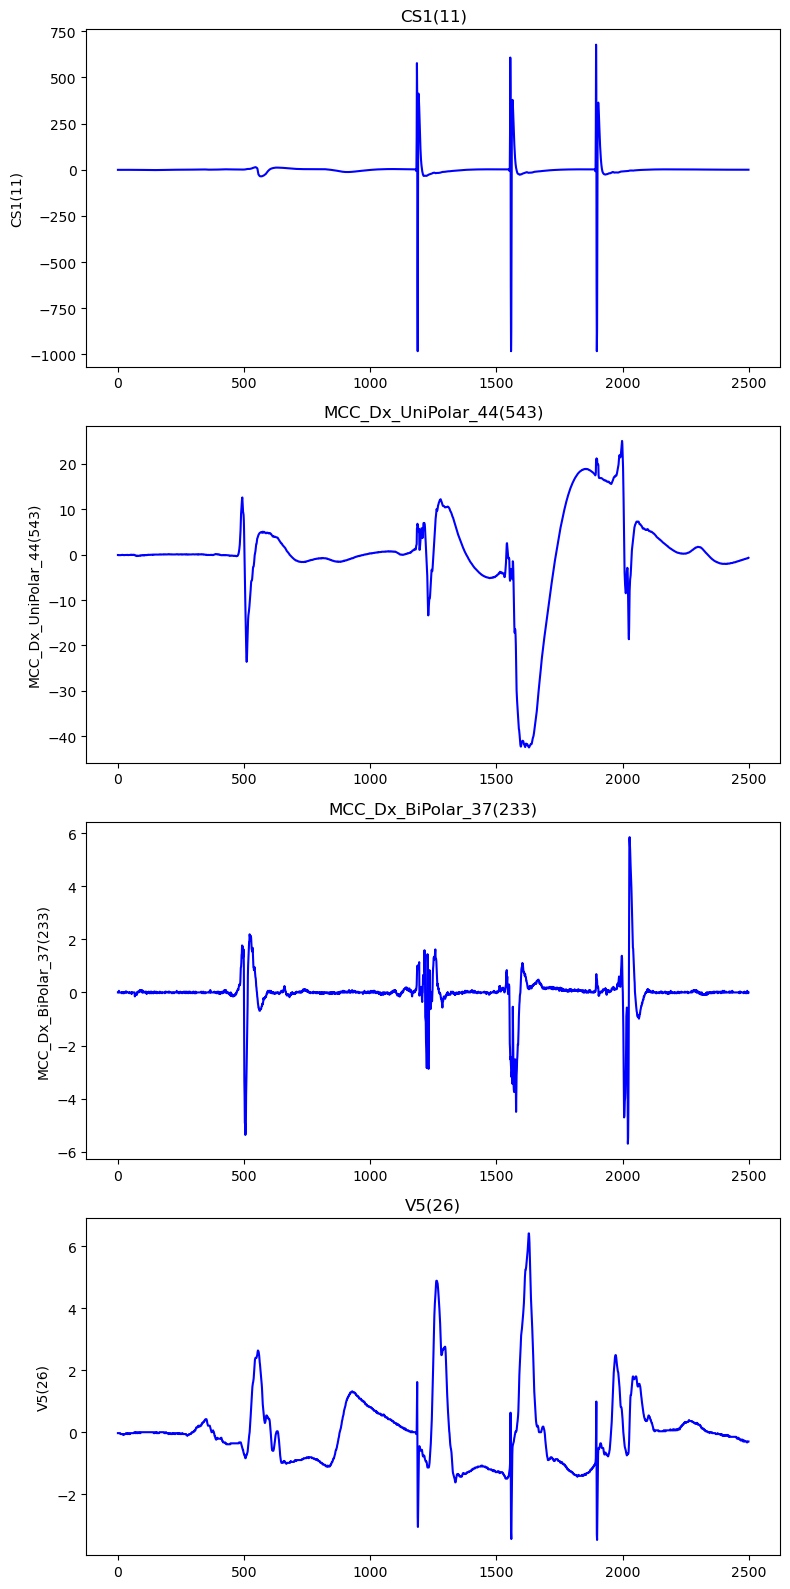

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear los plots
num_plots = len(col_interes)
fig, axs = plt.subplots(num_plots, 1, figsize=(8, 4*num_plots))  # Crear subplots en una columna y más alargados

# Iterar sobre las columnas de interés y crear los subplots
for i, col in enumerate(col_interes):
    axs[i].plot(df_seleccionado.index, df_seleccionado[col], linestyle='-', color='b')
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

### Apartado destinado a la exploración del uso de filtros y transformada de Fourier
Para realizar un análisis espectral de la señal, puedes usar la Transformada de Fourier, que permite transformar tus datos desde el dominio del tiempo al dominio de la frecuencia. La librería scipy de Python proporciona funciones útiles para realizar este tipo de análisis.
Tengo que realizar el análisis espectral de las muestras.

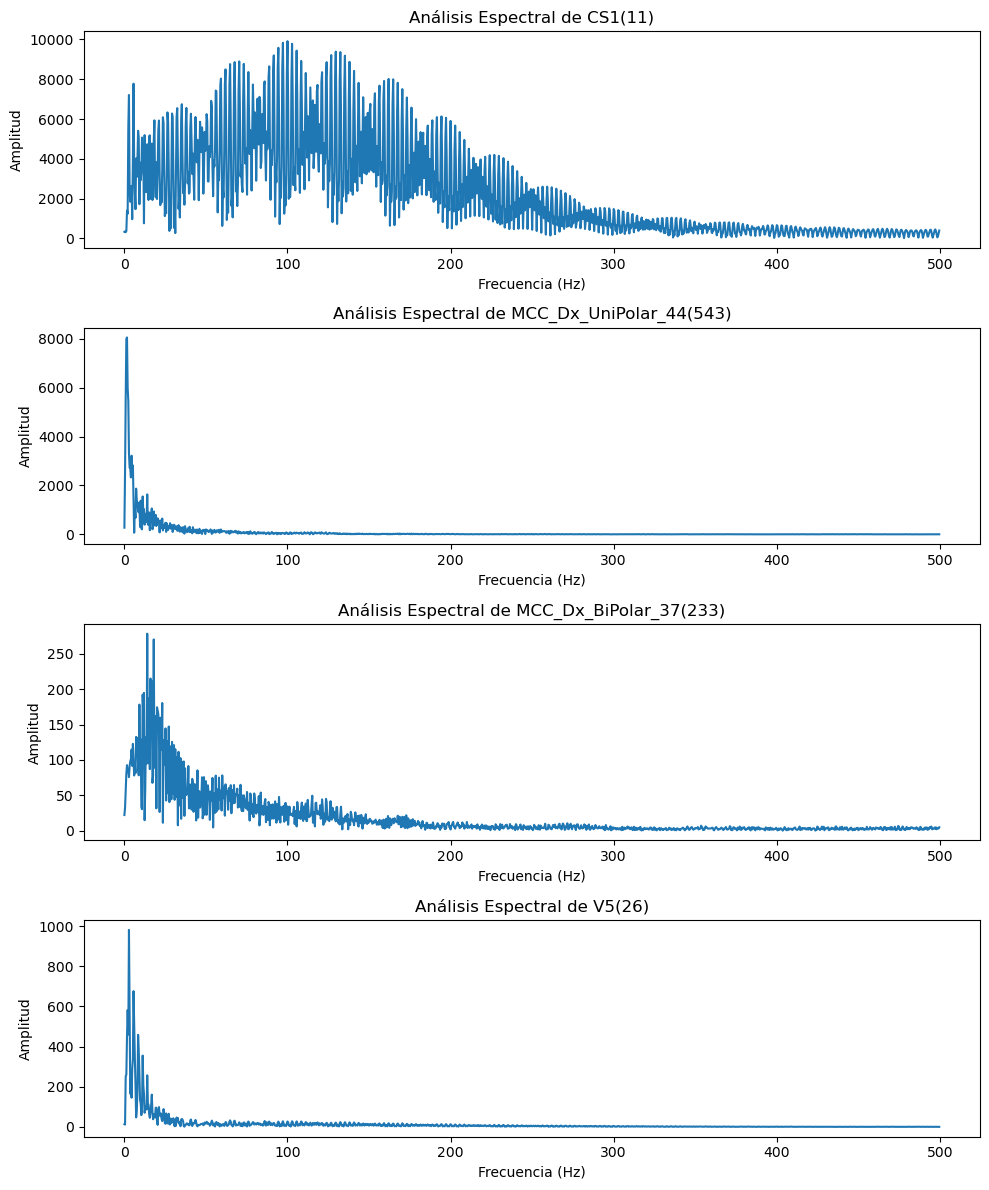

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
n = len(df_seleccionado)  # Número de muestras
t = np.arange(n) / fs  # Vector de tiempo

# FFT y visualización
fig, axs = plt.subplots(len(df_seleccionado.columns), 1, figsize=(10, 12))

for i, col in enumerate(df_seleccionado.columns):
    # Aplicar la FFT
    fft_vals = np.fft.fft(df_seleccionado[col]) # calcula la FFT de la columna actual.
    fft_freqs = np.fft.fftfreq(n, 1/fs) #calcula las frecuencias correspondientes para los valores de la FFT.

    # Solo consideramos la mitad positiva del espectro
    positive_freqs = fft_freqs[:n//2] # selecciona solo las frecuencias positivas del espectro
    positive_fft_vals = np.abs(fft_vals[:n//2]) #toma el valor absoluto de la FFT para obtener la magnitud de las componentes de frecuencia.

    # Plot
    axs[i].plot(positive_freqs, positive_fft_vals)
    axs[i].set_title(f'Análisis Espectral de {col}')
    axs[i].set_xlabel('Frecuencia (Hz)')
    axs[i].set_ylabel('Amplitud')

plt.tight_layout()
plt.show()

# PRUEBAS CON FILTROS


Filtros por usar en base al TFM:
ECG Lead (referencia): 0.25 - 150 Hz
Unipolar: 0.5 - 500 Hz
Bipolar:
30 - 500 Hz

# Aplicando los filtros FIR basados en la bibliografía

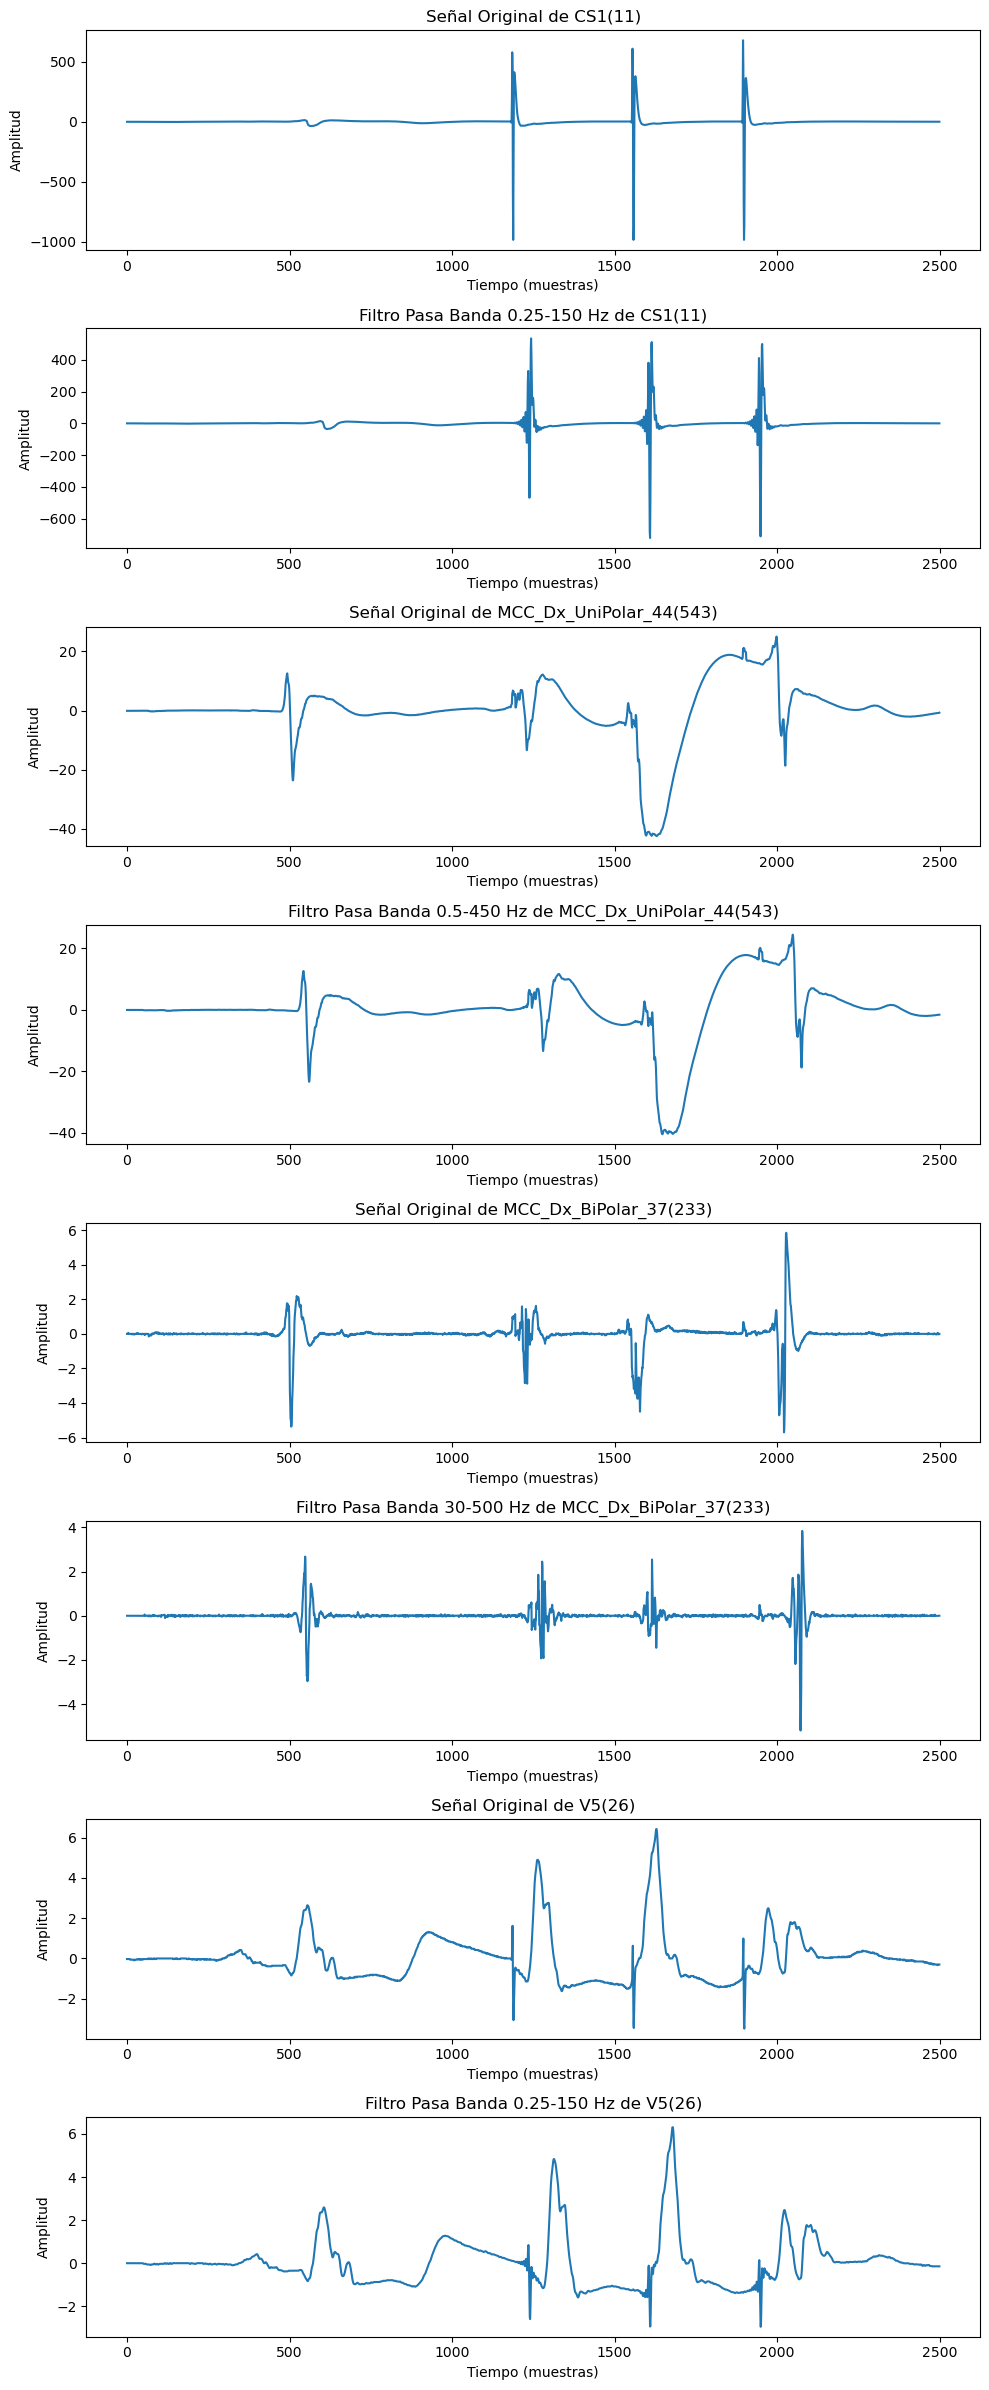

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Supongamos que df_seleccionado es tu DataFrame original
df = df_seleccionado

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
nyq = fs / 2  # Frecuencia de Nyquist

# Diseño de los filtros FIR para diferentes columnas
# Pasa banda para CS1(11) y V5(26)
cutoff_band_ref = [0.25, 150]  # Frecuencias de corte en Hz
fir_band_ref = firwin(101, [cutoff_band_ref[0] / nyq, cutoff_band_ref[1] / nyq], pass_zero=False)

# Pasa banda para MCC_Dx_UniPolar_44(543)
cutoff_band_uni = [0.5, 450]  # Frecuencias de corte en Hz
fir_band_uni = firwin(101, [cutoff_band_uni[0] / nyq, cutoff_band_uni[1] / nyq], pass_zero=False)

# Pasa banda para MCC_Dx_BiPolar_37(233)
cutoff_band_bi = [30, 499]  # Frecuencias de corte en Hz - para que no de problemas no uso 500
fir_band_bi = firwin(101, [cutoff_band_bi[0] / nyq, cutoff_band_bi[1] / nyq], pass_zero=False)

# Aplicar los filtros y visualizar los resultados
fig, axs = plt.subplots(len(df.columns) * 2, 1, figsize=(10, len(df.columns) * 6))

for i, col in enumerate(df.columns):
    # Señal original
    axs[i*2].plot(df[col])
    axs[i*2].set_title(f'Señal Original de {col}')
    axs[i*2].set_xlabel('Tiempo (muestras)')
    axs[i*2].set_ylabel('Amplitud')

    # Aplicar filtros específicos
    if col == "CS1(11)" or col == "V5(26)":
        filtered = lfilter(fir_band_ref, 1.0, df[col])
        filter_desc = 'Filtro Pasa Banda 0.25-150 Hz'
    elif col == "MCC_Dx_UniPolar_44(543)":
        filtered = lfilter(fir_band_uni, 1.0, df[col])
        filter_desc = 'Filtro Pasa Banda 0.5-450 Hz'
    elif col == "MCC_Dx_BiPolar_37(233)":
        filtered = lfilter(fir_band_bi, 1.0, df[col])
        filter_desc = 'Filtro Pasa Banda 30-500 Hz'

    # Señal filtrada
    axs[i*2 + 1].plot(filtered)
    axs[i*2 + 1].set_title(f'{filter_desc} de {col}')
    axs[i*2 + 1].set_xlabel('Tiempo (muestras)')
    axs[i*2 + 1].set_ylabel('Amplitud')

plt.tight_layout()
plt.show()

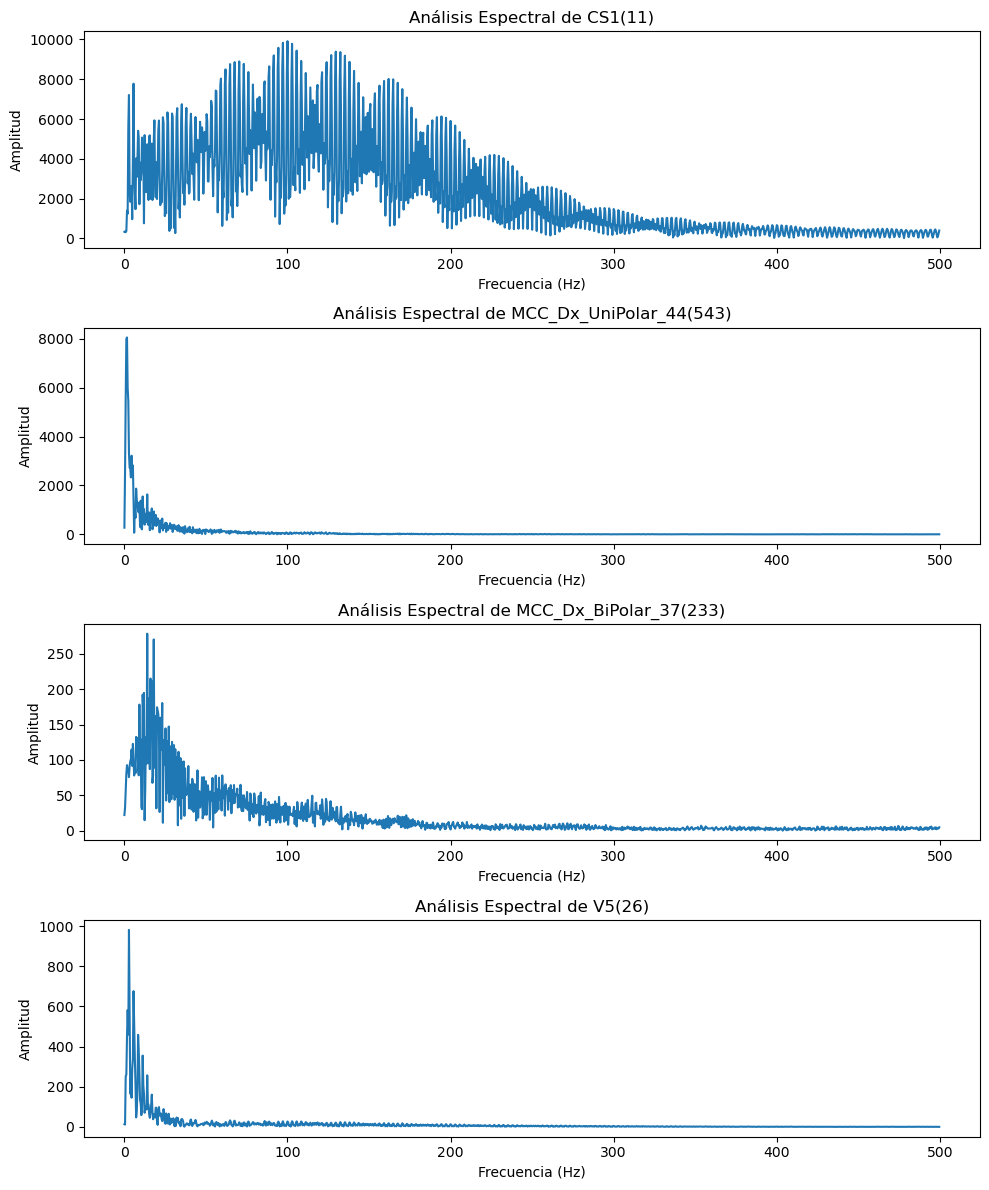

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
n = len(df_seleccionado)  # Número de muestras
t = np.arange(n) / fs  # Vector de tiempo

# FFT y visualización
fig, axs = plt.subplots(len(df_seleccionado.columns), 1, figsize=(10, 12))

for i, col in enumerate(df_seleccionado.columns):
    # Aplicar la FFT
    fft_vals = np.fft.fft(df_seleccionado[col]) # calcula la FFT de la columna actual.
    fft_freqs = np.fft.fftfreq(n, 1/fs) #calcula las frecuencias correspondientes para los valores de la FFT.

    # Solo consideramos la mitad positiva del espectro
    positive_freqs = fft_freqs[:n//2] # selecciona solo las frecuencias positivas del espectro
    positive_fft_vals = np.abs(fft_vals[:n//2]) #toma el valor absoluto de la FFT para obtener la magnitud de las componentes de frecuencia.

    # Plot
    axs[i].plot(positive_freqs, positive_fft_vals)
    axs[i].set_title(f'Análisis Espectral de {col}')
    axs[i].set_xlabel('Frecuencia (Hz)')
    axs[i].set_ylabel('Amplitud')

plt.tight_layout()
plt.show()

## Prueba de código para detectar espículas
Para detectar las espiculas, pongo un umbral y cojo el umbral a partir de la mitad+algo de las espiculas, y de ahi lo uso para comenzar a separar las señales
CS1, separar ritmo sinusal, de las 3 espiculas


In [15]:
# Aislar los datos de V5 para facilitar el tratamiento
cs1 = df['CS1(11)']
print(cs1)

0      -0.78
1      -0.81
2      -0.81
3      -0.81
4      -0.78
        ... 
2495   -0.09
2496   -0.09
2497   -0.06
2498   -0.09
2499   -0.09
Name: CS1(11), Length: 2500, dtype: float64


## Reajustes del umbral para reducir el número de segmentaciones

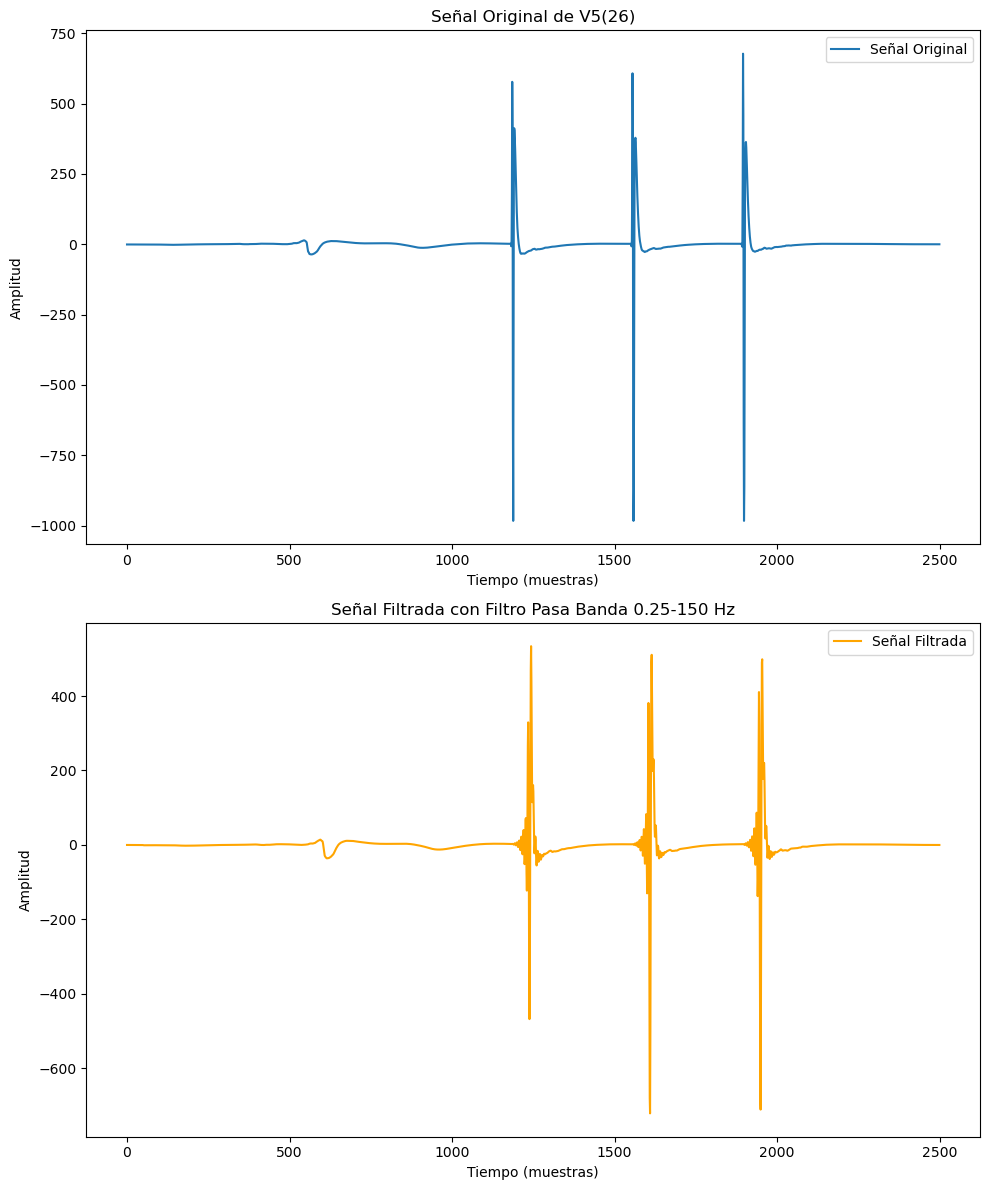

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter


# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
nyq = fs / 2  # Frecuencia de Nyquist

# Diseño del filtro FIR pasa banda
cutoff_band_ref = [0.25, 150]  # Frecuencias de corte en Hz
fir_band_ref = firwin(101, [cutoff_band_ref[0] / nyq, cutoff_band_ref[1] / nyq], pass_zero=False)

# Aplicar el filtro a la señal
filtered_cs1 = lfilter(fir_band_ref, 1.0, cs1)

# Visualización de los resultados
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Señal original
axs[0].plot(cs1, label='Señal Original')
axs[0].set_title('Señal Original de V5(26)')
axs[0].set_xlabel('Tiempo (muestras)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()

# Señal filtrada
axs[1].plot(filtered_cs1, label='Señal Filtrada', color='orange')
axs[1].set_title('Señal Filtrada con Filtro Pasa Banda 0.25-150 Hz')
axs[1].set_xlabel('Tiempo (muestras)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()

plt.tight_layout()
plt.show()

La división de la señal la tienes que hacer sobre el CS1, una vez te quedas con las 3 espiculas, todo lo demas es el sinusal. De ahí tienes que sacar el valor máximo en absoluto.

#### Código que diseña un filtro FIR pasa banda con las frecuencias de corte de 30 Hz y 50 Hz, y luego visualiza la respuesta en frecuencia del filtro en un gráfico, mostrando cómo varía la ganancia del filtro en función de la frecuencia.

Código 1:
Calcula la FFT de la señal original (df['MCC_Dx_BiPolar_37(233)']) antes de aplicar el filtro FIR.
Plotea la respuesta en frecuencia del filtro FIR y la FFT de la señal original.
Visualización de la Respuesta en Frecuencia del Filtro:
La respuesta en frecuencia del filtro FIR se muestra en el gráfico con un factor de escalado de 250 (np.abs(h * 250)).
Se centra en mostrar la FFT de la señal original y la respuesta en frecuencia del filtro FIR en un solo gráfico.
La FFT se calcula para la señal original antes de aplicar el filtro, mostrando cómo se distribuyen las frecuencias en la señal original.

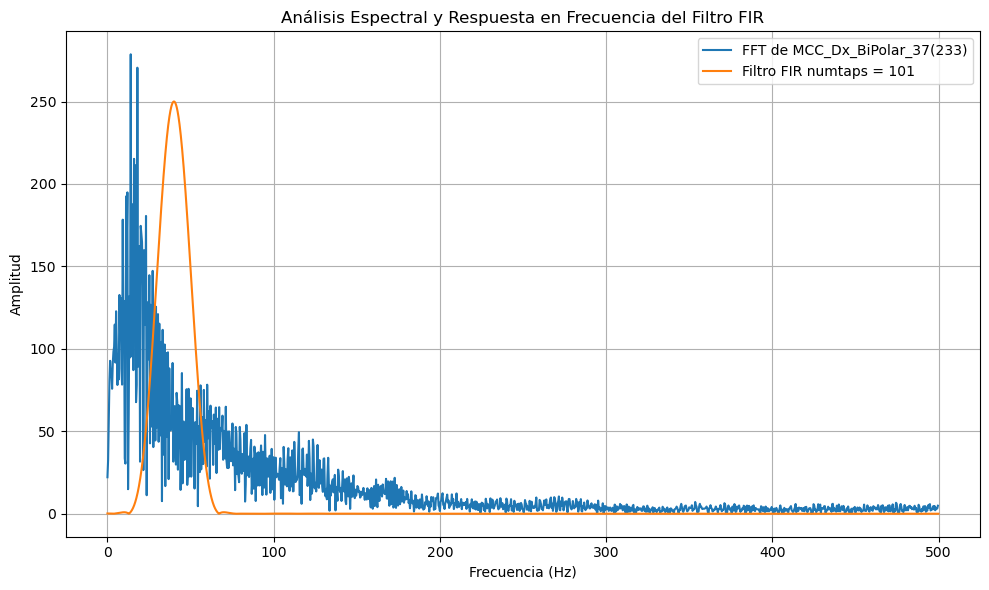

In [20]:
import matplotlib.pyplot as plt
from scipy.signal import freqz, firwin
import numpy as np

# Supongamos que df_seleccionado es tu DataFrame original
df = df_seleccionado

# Parámetros
fs = 1000
nyq = fs / 2

# Valor de numtaps
numtaps = 101

# Pasa banda para MCC_Dx_BiPolar_37(233)
cutoff_band_bi = [30, 50]  # Frecuencias de corte en Hz

# Crear el filtro FIR
fir_band_bi = firwin(numtaps, [cutoff_band_bi[0] / nyq, cutoff_band_bi[1] / nyq], pass_zero=False)
w, h = freqz(fir_band_bi, worN=8000)

# FFT y visualización
signal = df['MCC_Dx_BiPolar_37(233)']
n = len(signal)

fft_vals = np.fft.fft(signal)  # Calcula la FFT de la señal
fft_freqs = np.fft.fftfreq(n, 1/fs)  # Calcula las frecuencias correspondientes para la FFT

# Solo consideramos la mitad positiva del espectro
positive_freqs = fft_freqs[:n//2]  # Selecciona solo las frecuencias positivas del espectro
positive_fft_vals = np.abs(fft_vals[:n//2])  # Toma el valor absoluto de la FFT para obtener la magnitud

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Plotear la FFT
ax.plot(positive_freqs, positive_fft_vals, label='FFT de MCC_Dx_BiPolar_37(233)')

# Plotear la respuesta en frecuencia del filtro
ax.plot((w / np.pi) * nyq, np.abs(h * 250), label=f'Filtro FIR numtaps = {numtaps}')

# Configurar el gráfico
ax.set_title('Análisis Espectral y Respuesta en Frecuencia del Filtro FIR')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Amplitud')
ax.legend()
ax.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Código 2:
Primero aplica el filtro FIR a la señal (lfilter(fir_band_bi, 1.0, df['MCC_Dx_BiPolar_37(233)'])), y luego calcula la FFT de la señal filtrada.
Plotea la FFT de la señal filtrada y la respuesta en frecuencia del filtro FIR.
Código 2:
La respuesta en frecuencia del filtro FIR se muestra en el gráfico con un factor de escalado de 120 (np.abs(h * 120)).
Se enfoca en mostrar la FFT de la señal filtrada y la respuesta en frecuencia del filtro FIR, dando un enfoque más claro en cómo el filtro afecta la señal.
La FFT se calcula para la señal después de aplicar el filtro, mostrando cómo el filtro ha modificado el contenido de frecuencia de la señal.

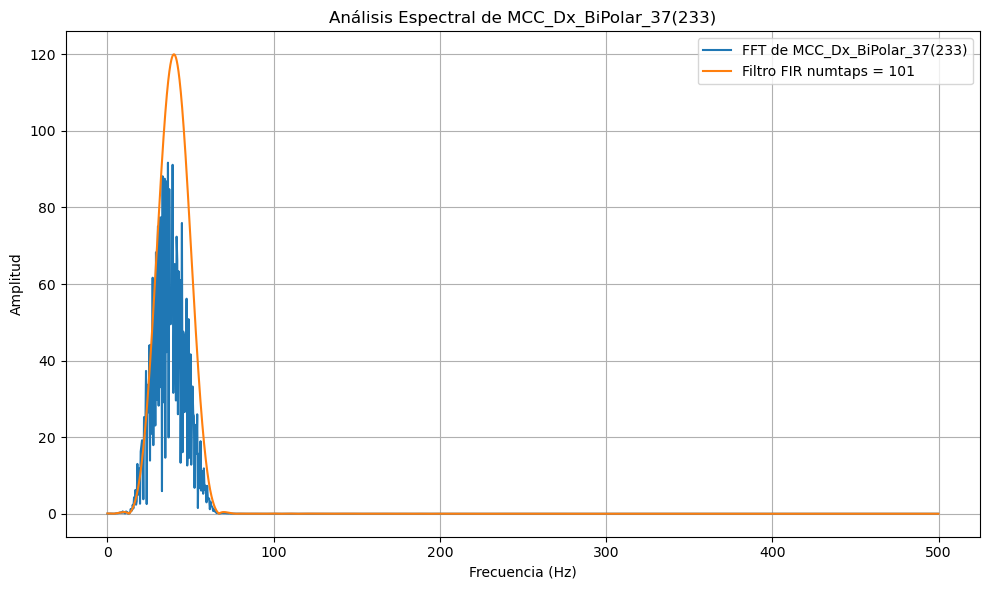

In [38]:
import matplotlib.pyplot as plt
from scipy.signal import freqz, firwin, lfilter
import numpy as np

# Supongamos que df_seleccionado es tu DataFrame original
df = df_seleccionado

# Parámetros
fs = 1000
nyq = fs / 2
n = len(df['MCC_Dx_BiPolar_37(233)'])

# Pasa banda para MCC_Dx_BiPolar_37(233)
cutoff_band_bi = [30, 50]  # Frecuencias de corte en Hz
numtaps = 101
fir_band_bi = firwin(numtaps, [cutoff_band_bi[0] / nyq, cutoff_band_bi[1] / nyq], pass_zero=False)
filtered_bi = lfilter(fir_band_bi, 1.0, df['MCC_Dx_BiPolar_37(233)'])
filter_desc_bi = 'Filtro Pasa Banda 30-50 Hz'

# FFT y visualización
fft_vals = np.fft.fft(filtered_bi)  # calcula la FFT de la columna actual.
fft_freqs = np.fft.fftfreq(n, 1/fs)  # calcula las frecuencias correspondientes para los valores de la FFT.

# Solo consideramos la mitad positiva del espectro
positive_freqs = fft_freqs[:n//2]  # selecciona solo las frecuencias positivas del espectro
positive_fft_vals = np.abs(fft_vals[:n//2])  # toma el valor absoluto de la FFT para obtener la magnitud de las componentes de frecuencia.

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Plotear la FFT
ax.plot(positive_freqs, positive_fft_vals, label='FFT de MCC_Dx_BiPolar_37(233)')

# Plotear la respuesta en frecuencia del filtro
w, h = freqz(fir_band_bi, worN=8000)
ax.plot((w / np.pi) * nyq, np.abs(h * 120), label=f'Filtro FIR numtaps = {numtaps}')

# Configurar el gráfico
ax.set_title('Análisis Espectral de MCC_Dx_BiPolar_37(233)')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Amplitud')
ax.legend()
ax.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Código 1 compara la respuesta en frecuencia del filtro FIR con la FFT de la señal original, proporcionando una visión de cómo el filtro FIR se comporta con la señal sin filtrar.
### Código 2 muestra cómo el filtro FIR afecta la señal aplicando el filtro antes de calcular la FFT, enfocándose en el impacto del filtro sobre la señal filtrada.
Ambos enfoques son útiles dependiendo del análisis que se desea realizar: si se quiere ver la influencia del filtro en la señal original o cómo la señal filtrada se comporta en el dominio de la frecuencia.

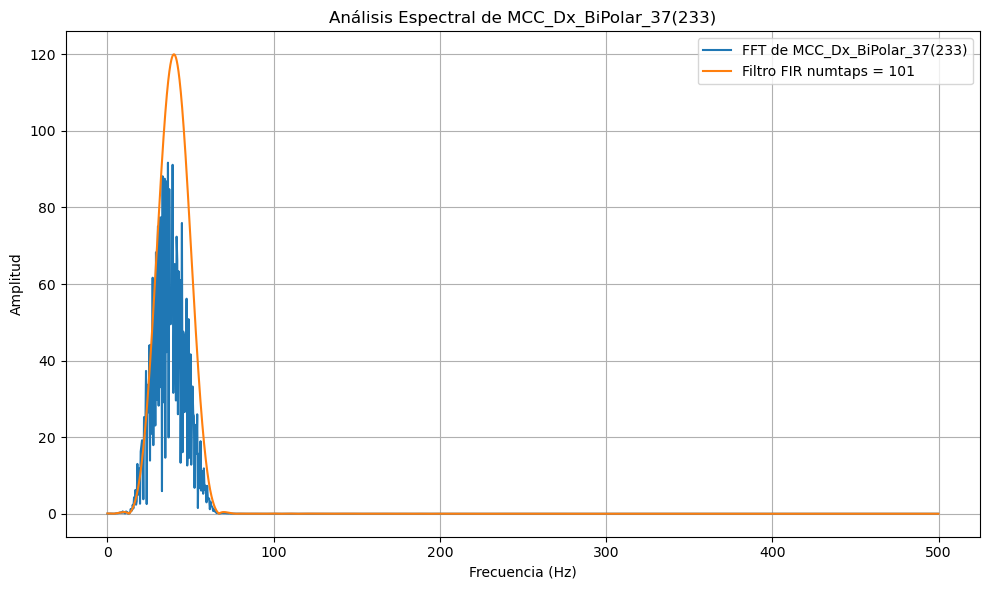

In [41]:
import matplotlib.pyplot as plt
from scipy.signal import freqz, firwin, lfilter
import numpy as np

# Supongamos que df_seleccionado es tu DataFrame original
df = df_seleccionado

# Parámetros
fs = 1000
nyq = fs / 2
n = len(df['MCC_Dx_BiPolar_37(233)'])

# Pasa banda para MCC_Dx_BiPolar_37(233)
cutoff_band_bi = [30, 50]  # Frecuencias de corte en Hz
numtaps = 101
fir_band_bi = firwin(numtaps, [cutoff_band_bi[0] / nyq, cutoff_band_bi[1] / nyq], pass_zero=False)
filtered_bi = lfilter(fir_band_bi, 1.0, df['MCC_Dx_BiPolar_37(233)'])
filter_desc_bi = 'Filtro Pasa Banda 30-50 Hz'

# FFT y visualización
fft_vals = np.fft.fft(filtered_bi)  # Calcula la FFT de la señal filtrada.
fft_freqs = np.fft.fftfreq(n, 1/fs)  # Calcula las frecuencias correspondientes para los valores de la FFT.

# Solo consideramos la mitad positiva del espectro
positive_freqs = fft_freqs[:n//2]  # Selecciona solo las frecuencias positivas del espectro.
positive_fft_vals = np.abs(fft_vals[:n//2])  # Toma el valor absoluto de la FFT para obtener la magnitud de las componentes de frecuencia.

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Plotear la FFT
ax.plot(positive_freqs, positive_fft_vals, label='FFT de MCC_Dx_BiPolar_37(233)')

# Plotear la respuesta en frecuencia del filtro
w, h = freqz(fir_band_bi, worN=8000)
ax.plot((w / np.pi) * nyq, np.abs(h * 120), label=f'Filtro FIR numtaps = {numtaps}')

# Configurar el gráfico
ax.set_title('Análisis Espectral de MCC_Dx_BiPolar_37(233)')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Amplitud')
ax.legend()
ax.grid()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

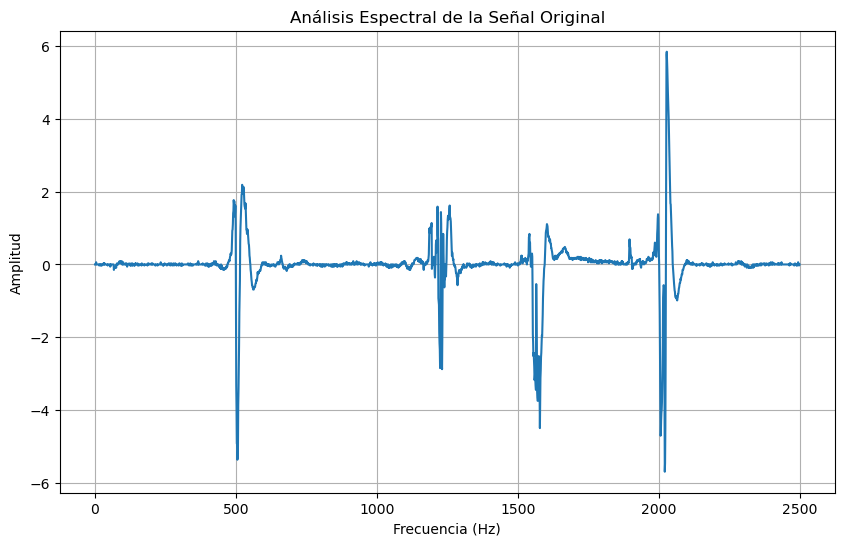

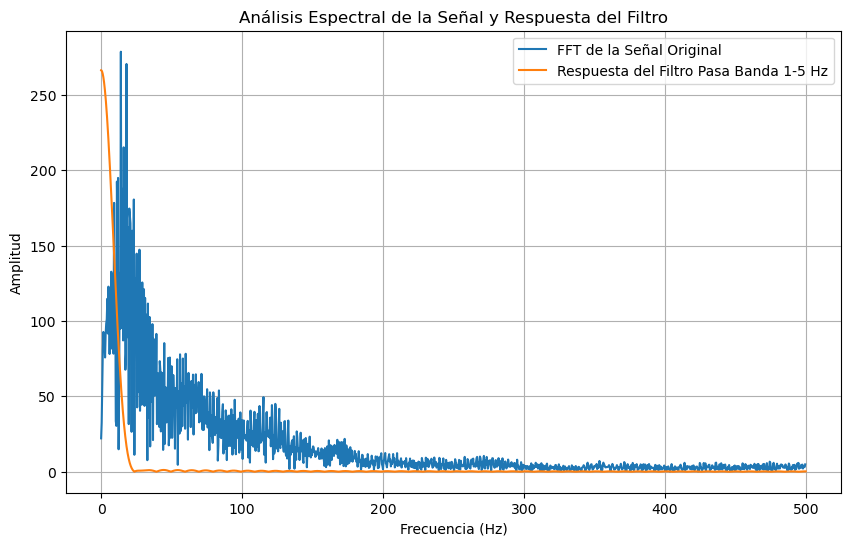

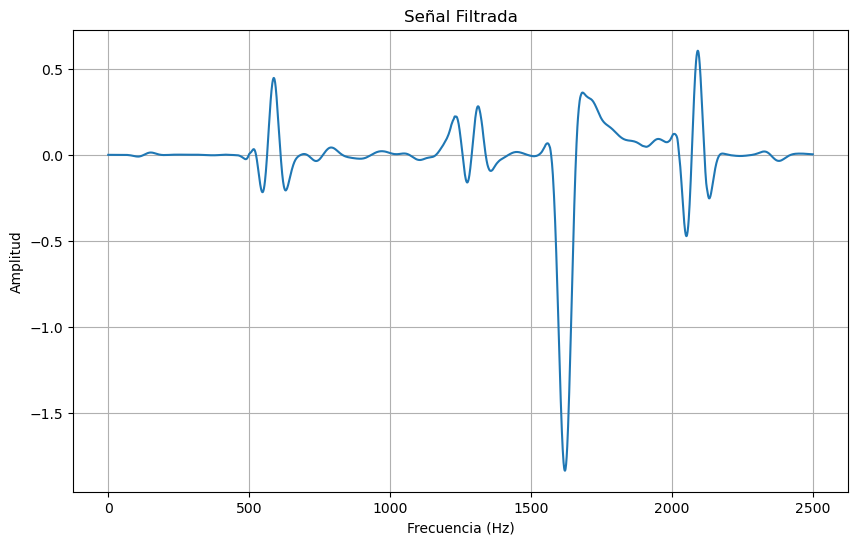

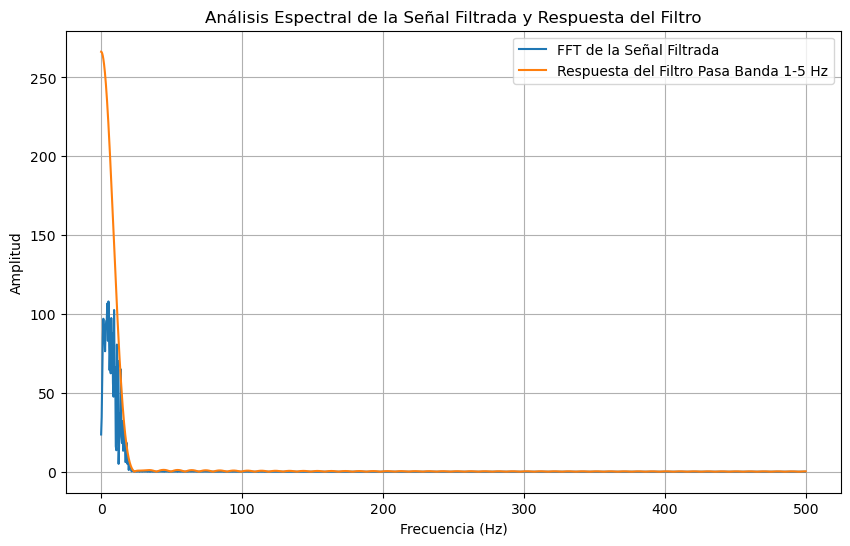

In [21]:
import matplotlib.pyplot as plt
from scipy.signal import freqz, firwin, lfilter
import numpy as np

# Supongamos que df_seleccionado es tu DataFrame original
df = df_seleccionado

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
nyq = fs / 2  # Frecuencia de Nyquist
n = len(df['MCC_Dx_BiPolar_37(233)'])  # Número de muestras en la señal

# 1. Visualizar la señal original
plt.figure(figsize=(10, 6))
plt.plot(df['MCC_Dx_BiPolar_37(233)'])
plt.grid()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Análisis Espectral de la Señal Original')
plt.show()

# 2. Filtrar la señal
# Definir las frecuencias de corte para el filtro pasa banda
cutoff_band_bi = [1, 5]  # Frecuencias de corte en Hz

# Crear el filtro FIR pasa banda
fir_band_bi = firwin(101, [cutoff_band_bi[0] / nyq, cutoff_band_bi[1] / nyq], pass_zero=False)

# Aplicar el filtro a la señal
filtered_bi = lfilter(fir_band_bi, 1.0, df['MCC_Dx_BiPolar_37(233)'])

# Descripción del filtro
filter_desc_bi = 'Filtro Pasa Banda 1-5 Hz'

# Calcular la respuesta en frecuencia del filtro
w, h = freqz(fir_band_bi, worN=8000)

# Calcular la FFT de la señal original
fft_vals = np.fft.fft(df['MCC_Dx_BiPolar_37(233)'])  # Calcula la FFT de la señal original
fft_freqs = np.fft.fftfreq(n, 1/fs)  # Calcula las frecuencias correspondientes para los valores de la FFT

# Solo considerar la mitad positiva del espectro
positive_freqs = fft_freqs[:n//2]  # Selecciona solo las frecuencias positivas del espectro
positive_fft_vals = np.abs(fft_vals[:n//2])  # Toma el valor absoluto de la FFT para obtener la magnitud

# 2.1 Visualizar la FFT de la señal original y la respuesta en frecuencia del filtro
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_fft_vals, label='FFT de la Señal Original')
plt.plot((w / np.pi) * nyq, np.abs(h * 250), label=f'Respuesta del {filter_desc_bi}')
plt.grid()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Análisis Espectral de la Señal y Respuesta del Filtro')
plt.legend()
plt.show()

# 3. Visualizar la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(filtered_bi)
plt.grid()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Señal Filtrada')
plt.show()

# 4. Visualizar el espectro de frecuencia de la señal filtrada
# Calcular la FFT de la señal filtrada
fft_vals = np.fft.fft(filtered_bi)  # Calcula la FFT de la señal filtrada
fft_freqs = np.fft.fftfreq(n, 1/fs)  # Calcula las frecuencias correspondientes para los valores de la FFT

# Solo considerar la mitad positiva del espectro
positive_freqs = fft_freqs[:n//2]  # Selecciona solo las frecuencias positivas del espectro
positive_fft_vals = np.abs(fft_vals[:n//2])  # Toma el valor absoluto de la FFT para obtener la magnitud

# 4.1 Visualizar la FFT de la señal filtrada y la respuesta en frecuencia del filtro
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_fft_vals, label='FFT de la Señal Filtrada')
plt.plot((w / np.pi) * nyq, np.abs(h * 250), label=f'Respuesta del {filter_desc_bi}')
plt.grid()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Análisis Espectral de la Señal Filtrada y Respuesta del Filtro')
plt.legend()
plt.show()

Señal en el tiempo

Señal en frecuencia con el filtro

Señal filtrada en el tiempo

Señal filtrada en frecuencia con el filtro

Crear limite superior y limite inferior y cortar las señales

# Código de detección de picos bueno

Procesando cs1:


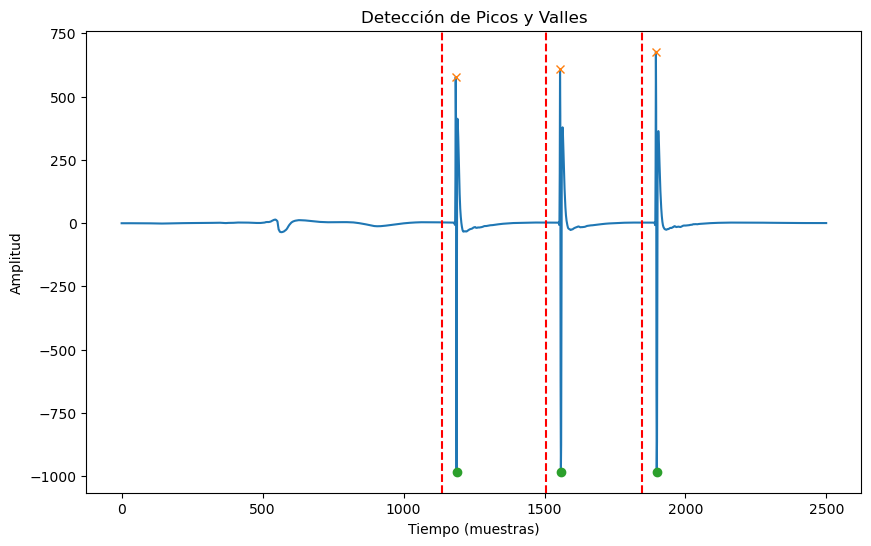

Segmento 1:
0      -0.78
1      -0.81
2      -0.81
3      -0.81
4      -0.78
        ... 
1130    2.70
1131    2.67
1132    2.64
1133    2.61
1134    2.58
Name: CS1(11), Length: 1135, dtype: float64


Segmento 2:
1135    2.58
1136    2.55
1137    2.52
1138    2.49
1139    2.46
        ... 
1500    1.80
1501    1.77
1502    1.77
1503    1.77
1504    1.74
Name: CS1(11), Length: 370, dtype: float64


Segmento 3:
1505    1.77
1506    1.77
1507    1.74
1508    1.71
1509    1.71
        ... 
1840    1.86
1841    1.86
1842    1.83
1843    1.83
1844    1.83
Name: CS1(11), Length: 340, dtype: float64


Segmento 4:
1845    1.83
1846    1.86
1847    1.86
1848    1.83
1849    1.83
        ... 
2495   -0.09
2496   -0.09
2497   -0.06
2498   -0.09
2499   -0.09
Name: CS1(11), Length: 655, dtype: float64




In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, firwin, lfilter

# Supongamos que df_seleccionado es tu DataFrame original
df = df_seleccionado
cs1 = df['CS1(11)']  # Asegurarnos de leer la columna correcta

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
nyq = fs / 2  # Frecuencia de Nyquist

# Diseño del filtro FIR pasa banda
cutoff_band_ref = [0.25, 150]  # Frecuencias de corte en Hz
fir_band_ref = firwin(101, [cutoff_band_ref[0] / nyq, cutoff_band_ref[1] / nyq], pass_zero=False)

# Aplicar el filtro a la señal
filtered_cs1 = lfilter(fir_band_ref, 1.0, cs1)

# Definir función para detectar picos y segmentar datos
def detectar_y_segmentar(data, threshold=500):
    # Detectar picos ascendentes y descendentes
    peaks, _ = find_peaks(data, height=threshold)
    troughs, _ = find_peaks(-data, height=threshold)

    # Unir picos y valles en una sola lista y ordenarlos
    peaks_and_troughs = np.sort(np.concatenate((peaks, troughs)))

    # Filtrar los puntos que superan el umbral en positivo seguido de un punto que lo supere en negativo
    valid_segments = []
    for i in range(len(peaks_and_troughs) - 1):
        if data[peaks_and_troughs[i]] > threshold and data[peaks_and_troughs[i + 1]] < -threshold:
            valid_segments.append(peaks_and_troughs[i])

    # Plotear los datos y los picos detectados
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    plt.plot(peaks, data[peaks], "x")
    plt.plot(troughs, data[troughs], "o")
    for seg in valid_segments:
        plt.axvline(x=seg - 50, color='r', linestyle='--')
    plt.title("Detección de Picos y Valles")
    plt.xlabel('Tiempo (muestras)')
    plt.ylabel('Amplitud')
    plt.show()

    # Dividir los datos en segmentos
    segments = []
    start = 0

    for index in valid_segments:
        end = max(0, index - 50)
        segments.append(data[start:end])
        start = end

    # Asegurarse de que la última parte del ritmo sinusal también se incluya
    segments.append(data[start:])

    # Imprimir los segmentos
    for i, segment in enumerate(segments):
        print(f"Segmento {i + 1}:")
        print(segment)
        print("\n")

    return segments

# Detectar y segmentar para cs1
print("Procesando cs1:")
segments_cs1 = detectar_y_segmentar(cs1, threshold=500)

# Detectar y segmentar para filtered_cs1
#print("Procesando filtered_cs1:")
#segments_filtered_cs1 = detectar_y_segmentar(filtered_cs1, threshold=500)

Dividir la espicula, trabajar sobre Cs1. De donde a donde llega cada uno de los segmentos para extrapolarlo y usarlos con la bipolar, unipolar, etc... Calcular el máximo y el minimo de la frecuencia

Procesando cs1:


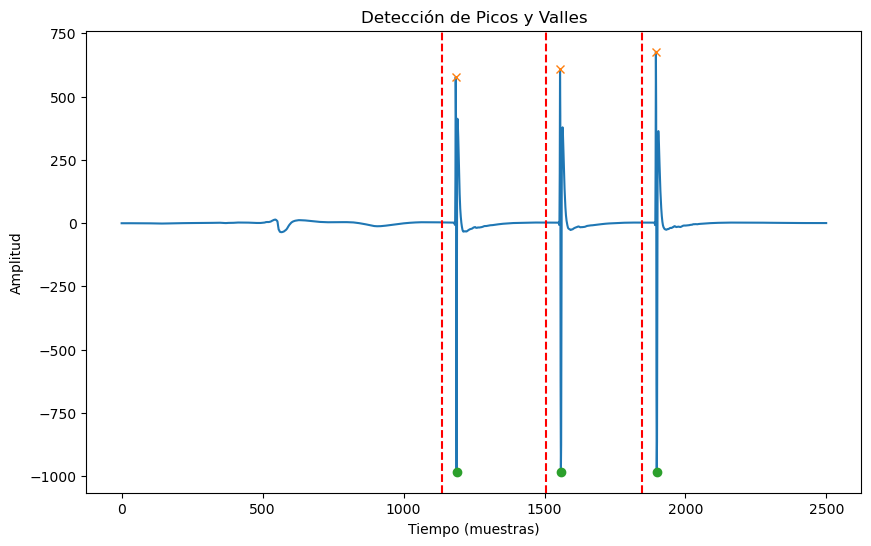

Segmento 1:
0      -0.78
1      -0.81
2      -0.81
3      -0.81
4      -0.78
        ... 
1130    2.70
1131    2.67
1132    2.64
1133    2.61
1134    2.58
Name: CS1(11), Length: 1135, dtype: float64
Slicer Segmento 1: (0, 1135)


Segmento 2:
1135    2.58
1136    2.55
1137    2.52
1138    2.49
1139    2.46
        ... 
1500    1.80
1501    1.77
1502    1.77
1503    1.77
1504    1.74
Name: CS1(11), Length: 370, dtype: float64
Slicer Segmento 2: (1135, 1505)


Segmento 3:
1505    1.77
1506    1.77
1507    1.74
1508    1.71
1509    1.71
        ... 
1840    1.86
1841    1.86
1842    1.83
1843    1.83
1844    1.83
Name: CS1(11), Length: 340, dtype: float64
Slicer Segmento 3: (1505, 1845)


Segmento 4:
1845    1.83
1846    1.86
1847    1.86
1848    1.83
1849    1.83
        ... 
2495   -0.09
2496   -0.09
2497   -0.06
2498   -0.09
2499   -0.09
Name: CS1(11), Length: 655, dtype: float64
Slicer Segmento 4: (1845, 2500)




In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, firwin, lfilter

# Supongamos que df_seleccionado es tu DataFrame original
df = df_seleccionado
cs1 = df['CS1(11)']  # Asegurarnos de leer la columna correcta

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
nyq = fs / 2  # Frecuencia de Nyquist

# Diseño del filtro FIR pasa banda
cutoff_band_ref = [0.25, 150]  # Frecuencias de corte en Hz
fir_band_ref = firwin(101, [cutoff_band_ref[0] / nyq, cutoff_band_ref[1] / nyq], pass_zero=False)

# Aplicar el filtro a la señal
filtered_cs1 = lfilter(fir_band_ref, 1.0, cs1)

# Definir función para detectar picos y segmentar datos
def detectar_y_segmentar(data, threshold=500):
    # Detectar picos ascendentes y descendentes
    peaks, _ = find_peaks(data, height=threshold)
    troughs, _ = find_peaks(-data, height=threshold)

    # Unir picos y valles en una sola lista y ordenarlos
    peaks_and_troughs = np.sort(np.concatenate((peaks, troughs)))

    # Filtrar los puntos que superan el umbral en positivo seguido de un punto que lo supere en negativo
    valid_segments = []
    for i in range(len(peaks_and_troughs) - 1):
        if data[peaks_and_troughs[i]] > threshold and data[peaks_and_troughs[i + 1]] < -threshold:
            valid_segments.append(peaks_and_troughs[i])

    # Plotear los datos y los picos detectados
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    plt.plot(peaks, data[peaks], "x")
    plt.plot(troughs, data[troughs], "o")
    for seg in valid_segments:
        plt.axvline(x=seg - 50, color='r', linestyle='--')
    plt.title("Detección de Picos y Valles")
    plt.xlabel('Tiempo (muestras)')
    plt.ylabel('Amplitud')
    plt.show()

    # Dividir los datos en segmentos
    segments = []
    slicers = []
    start = 0

    for index in valid_segments:
        end = max(0, index - 50)
        segments.append(data[start:end])
        slicers.append((start, end))
        start = end

    # Asegurarse de que la última parte del ritmo sinusal también se incluya
    segments.append(data[start:])
    slicers.append((start, len(data)))  # Incluye el último segmento completo

    return segments, slicers

# Detectar y segmentar para cs1
print("Procesando cs1:")
segments_cs1, slicers_cs1 = detectar_y_segmentar(cs1, threshold=500)

# Asignar segmentos a variables con nombres específicos
for i, segment in enumerate(segments_cs1):
    globals()[f'segmento{i + 1}'] = segment
    globals()[f'slicer_segmento{i + 1}'] = slicers_cs1[i]
    print(f"Segmento {i + 1}:")
    print(segment)
    print(f"Slicer Segmento {i + 1}: {slicers_cs1[i]}")
    print("\n")

# Detectar y segmentar para filtered_cs1 (opcional)
#print("Procesando filtered_cs1:")
#segments_filtered_cs1, slicers_filtered_cs1 = detectar_y_segmentar(filtered_cs1, threshold=500)

In [22]:
import numpy as np

def calcular_limites(signal):
    """
    Calcula el límite superior y el límite inferior de una señal.

    Parámetros:
    signal (list o np.array): La señal de la cual se desean calcular los límites.

    Retorna:
    tuple: Un par que contiene el límite inferior (mínimo) y el límite superior (máximo) de la señal.
    """
    limite_inferior = np.min(signal)
    limite_superior = np.max(signal)
    
    return limite_inferior, limite_superior

Procesando cs1:


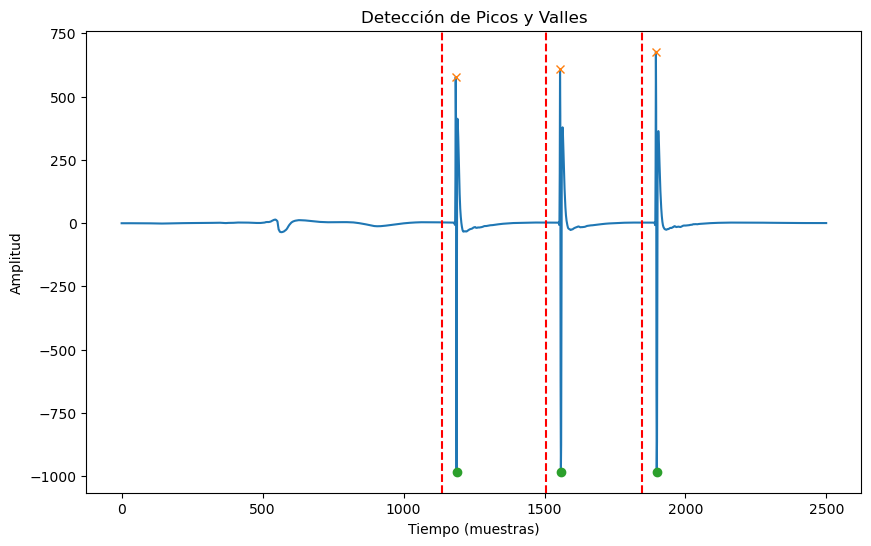

Resultados para Unipolar:
Segmento 1 de Unipolar:
Máximo: 12.57
Mínimo: -23.61


Segmento 2 de Unipolar:
Máximo: 12.18
Mínimo: -13.379999999999999


Segmento 3 de Unipolar:
Máximo: 18.75
Mínimo: -42.449999999999996


Segmento 4 de Unipolar:
Máximo: 25.02
Mínimo: -18.63


Resultados para Bipolar:
Segmento 1 de Bipolar:
Máximo: 2.19
Mínimo: -5.37


Segmento 2 de Bipolar:
Máximo: 1.6199999999999999
Mínimo: -2.88


Segmento 3 de Bipolar:
Máximo: 1.1099999999999999
Mínimo: -4.5


Segmento 4 de Bipolar:
Máximo: 5.85
Mínimo: -5.7


Resultados para V5:
Segmento 1 de V5:
Máximo: 2.6399999999999997
Mínimo: -1.1099999999999999


Segmento 2 de V5:
Máximo: 4.89
Mínimo: -3.06


Segmento 3 de V5:
Máximo: 6.42
Mínimo: -3.4499999999999997


Segmento 4 de V5:
Máximo: 2.4899999999999998
Mínimo: -3.48




In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, firwin, lfilter

# Supongamos que df_seleccionado es tu DataFrame original
df = df_seleccionado

# Asumir que las señales Unipolar, Bipolar y V5 están en el DataFrame
unipolar = df['MCC_Dx_UniPolar_44(543)']
bipolar = df['MCC_Dx_BiPolar_37(233)']
v5 = df['V5(26)']

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
nyq = fs / 2  # Frecuencia de Nyquist

# Diseño del filtro FIR pasa banda
cutoff_band_ref = [0.25, 150]  # Frecuencias de corte en Hz
fir_band_ref = firwin(101, [cutoff_band_ref[0] / nyq, cutoff_band_ref[1] / nyq], pass_zero=False)

# Aplicar el filtro a la señal cs1
cs1 = df['CS1(11)']
filtered_cs1 = lfilter(fir_band_ref, 1.0, cs1)

# Definir función para detectar picos y segmentar datos
def detectar_y_segmentar(data, threshold=500):
    # Detectar picos ascendentes y descendentes
    peaks, _ = find_peaks(data, height=threshold)
    troughs, _ = find_peaks(-data, height=threshold)

    # Unir picos y valles en una sola lista y ordenarlos
    peaks_and_troughs = np.sort(np.concatenate((peaks, troughs)))

    # Filtrar los puntos que superan el umbral en positivo seguido de un punto que lo supere en negativo
    valid_segments = []
    for i in range(len(peaks_and_troughs) - 1):
        if data[peaks_and_troughs[i]] > threshold and data[peaks_and_troughs[i + 1]] < -threshold:
            valid_segments.append(peaks_and_troughs[i])

    # Plotear los datos y los picos detectados
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    plt.plot(peaks, data[peaks], "x")
    plt.plot(troughs, data[troughs], "o")
    for seg in valid_segments:
        plt.axvline(x=seg - 50, color='r', linestyle='--')
    plt.title("Detección de Picos y Valles")
    plt.xlabel('Tiempo (muestras)')
    plt.ylabel('Amplitud')
    plt.show()

    # Dividir los datos en segmentos
    segments = []
    slicers = []
    start = 0

    for index in valid_segments:
        end = max(0, index - 50)
        segments.append(data[start:end])
        slicers.append((start, end))
        start = end

    # Asegurarse de que la última parte del ritmo sinusal también se incluya
    segments.append(data[start:])
    slicers.append((start, len(data)))  # Incluye el último segmento completo

    return segments, slicers

# Detectar y segmentar para cs1
print("Procesando cs1:")
segments_cs1, slicers_cs1 = detectar_y_segmentar(cs1, threshold=500)

# Función para dividir otras señales en los mismos segmentos y calcular máximos y mínimos
def segmentar_y_calcular(signal, slicers):
    segmentos = []
    maximos = []
    minimos = []

    for start, end in slicers:
        segmento = signal[start:end]
        segmentos.append(segmento)
        maximos.append(np.max(segmento))
        minimos.append(np.min(segmento))

    return segmentos, maximos, minimos

# Dividir las señales Unipolar, Bipolar y V5 en los mismos segmentos
segments_unipolar, max_unipolar, min_unipolar = segmentar_y_calcular(unipolar, slicers_cs1)
segments_bipolar, max_bipolar, min_bipolar = segmentar_y_calcular(bipolar, slicers_cs1)
segments_v5, max_v5, min_v5 = segmentar_y_calcular(v5, slicers_cs1)

# Imprimir resultados
def imprimir_resultados(segments, maximos, minimos, nombre):
    for i, (segmento, maximo, minimo) in enumerate(zip(segments, maximos, minimos)):
        print(f"Segmento {i + 1} de {nombre}:")
        print(f"Máximo: {maximo}")
        print(f"Mínimo: {minimo}")
        print("\n")

print("Resultados para Unipolar:")
imprimir_resultados(segments_unipolar, max_unipolar, min_unipolar, "Unipolar")

print("Resultados para Bipolar:")
imprimir_resultados(segments_bipolar, max_bipolar, min_bipolar, "Bipolar")

print("Resultados para V5:")
imprimir_resultados(segments_v5, max_v5, min_v5, "V5")

Procesando cs1:


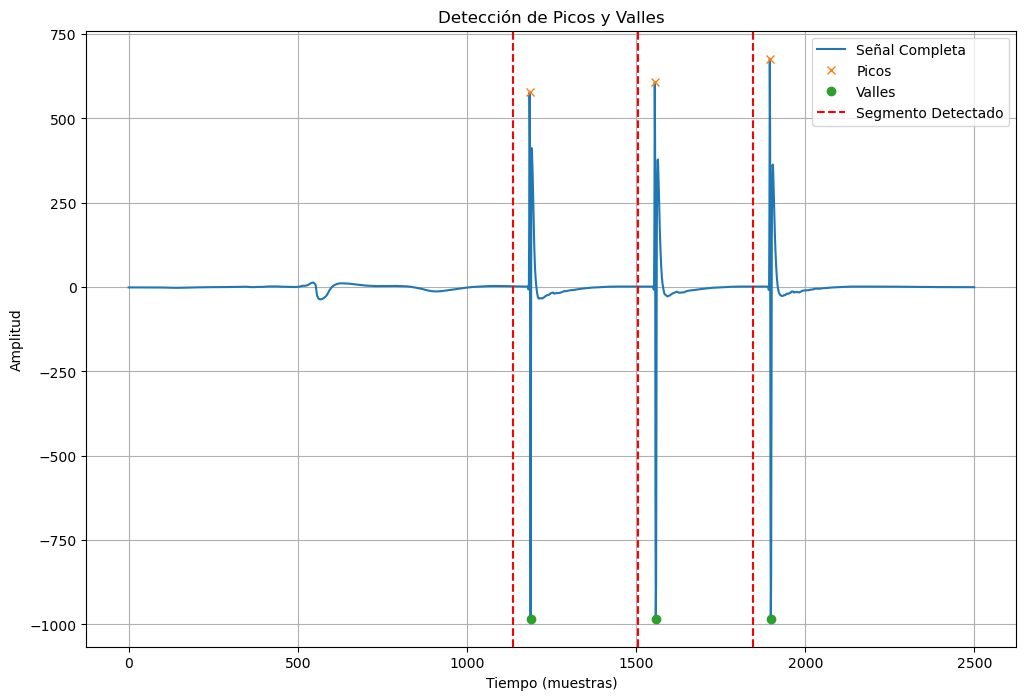

Resultados y gráficas para Unipolar:
Resultados para Unipolar:
Segmento 1:
Máximo: 12.57
Mínimo: -23.61


Segmento 2:
Máximo: 12.18
Mínimo: -13.379999999999999


Segmento 3:
Máximo: 18.75
Mínimo: -42.449999999999996


Segmento 4:
Máximo: 25.02
Mínimo: -18.63




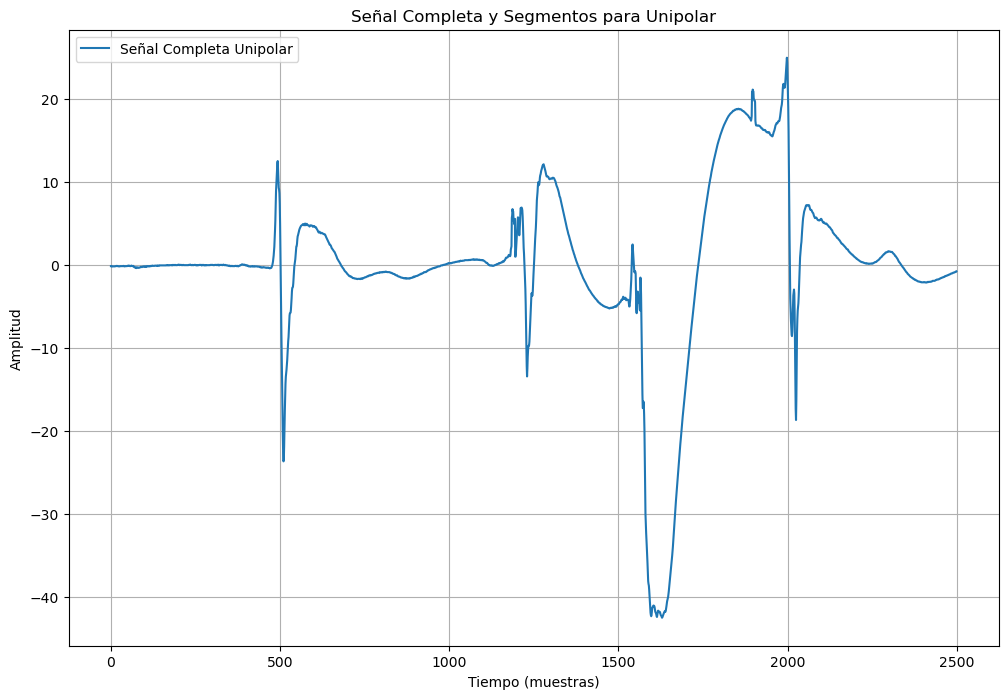

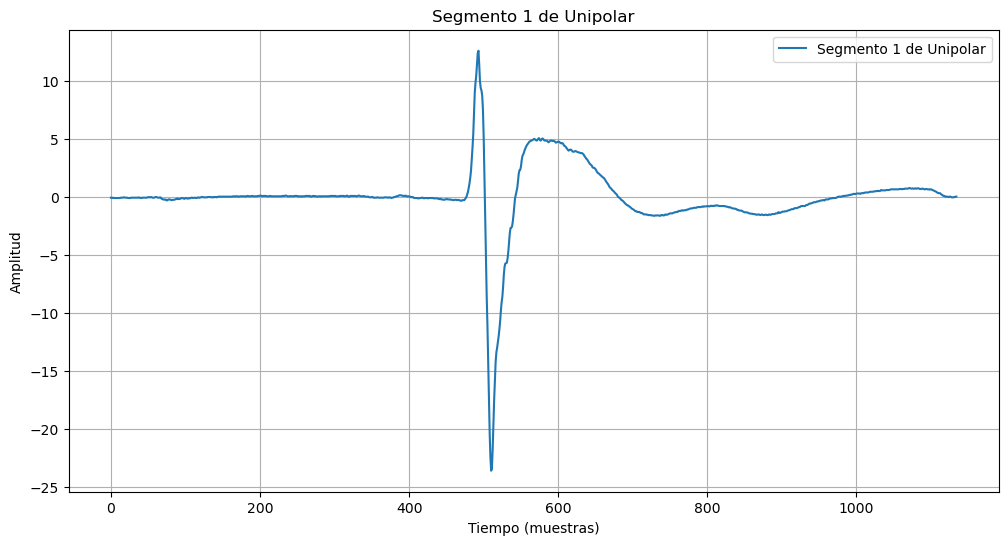

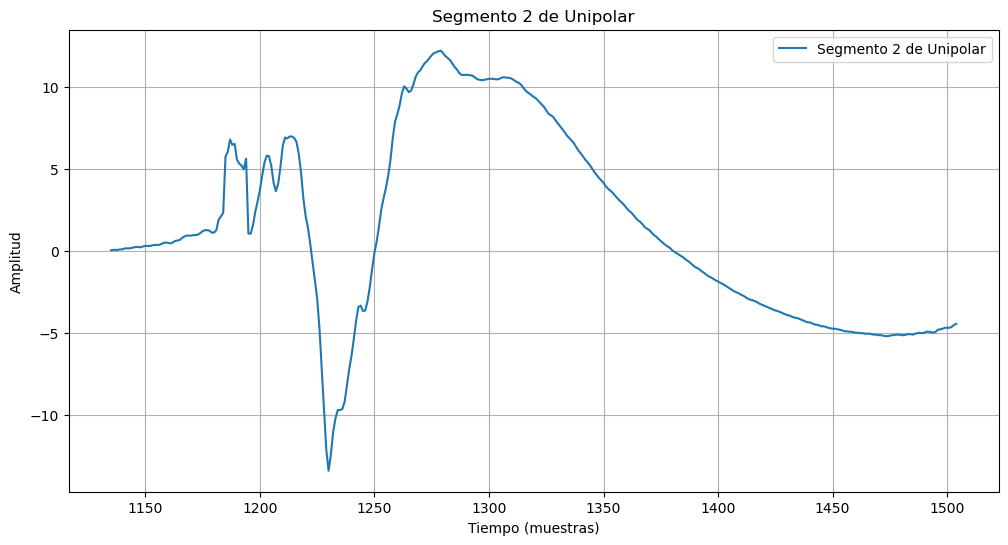

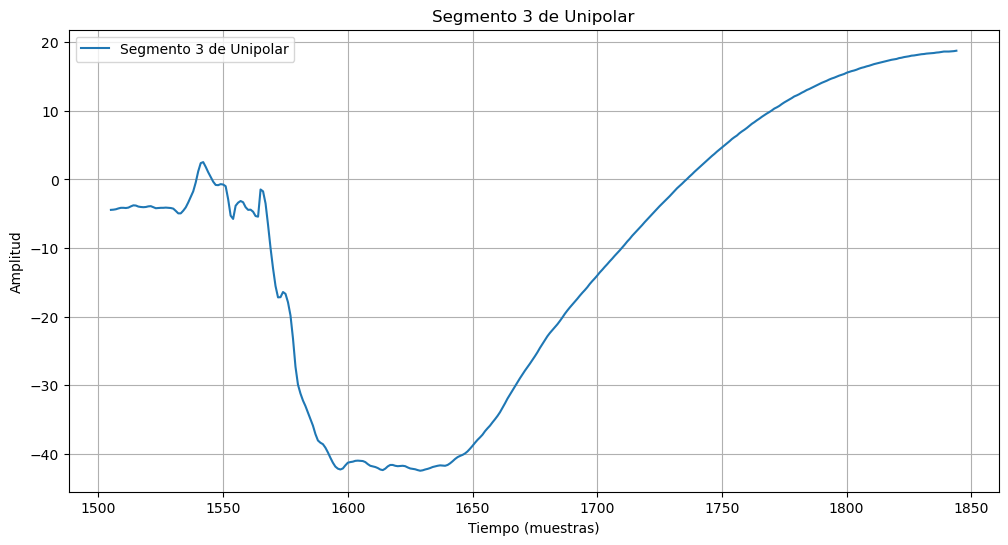

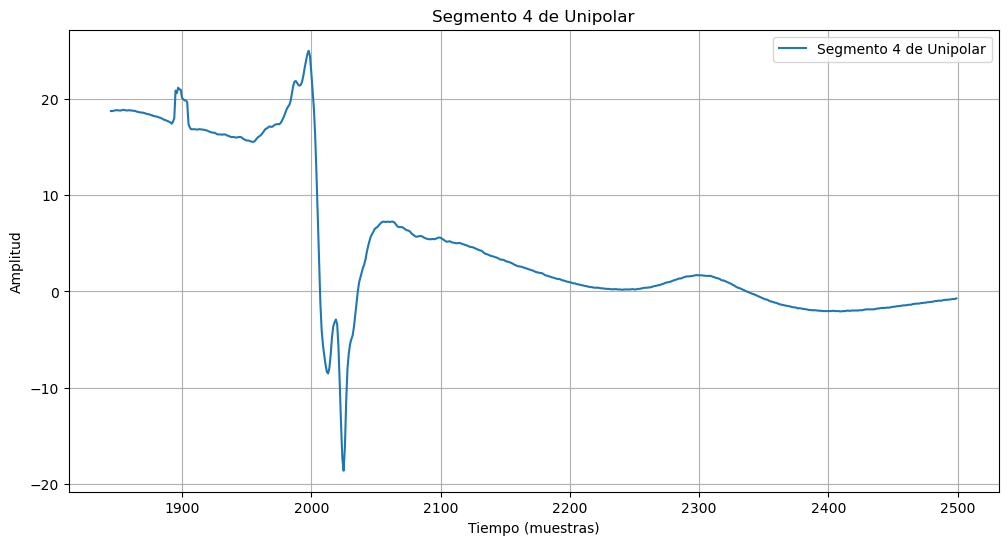

Resultados y gráficas para Bipolar:
Resultados para Bipolar:
Segmento 1:
Máximo: 2.19
Mínimo: -5.37


Segmento 2:
Máximo: 1.6199999999999999
Mínimo: -2.88


Segmento 3:
Máximo: 1.1099999999999999
Mínimo: -4.5


Segmento 4:
Máximo: 5.85
Mínimo: -5.7




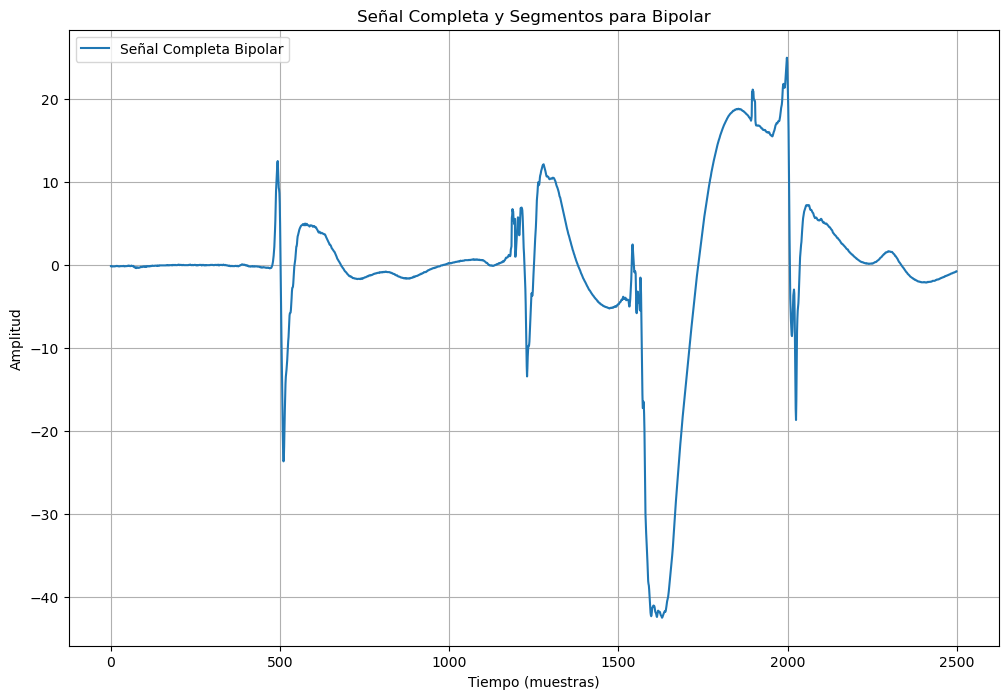

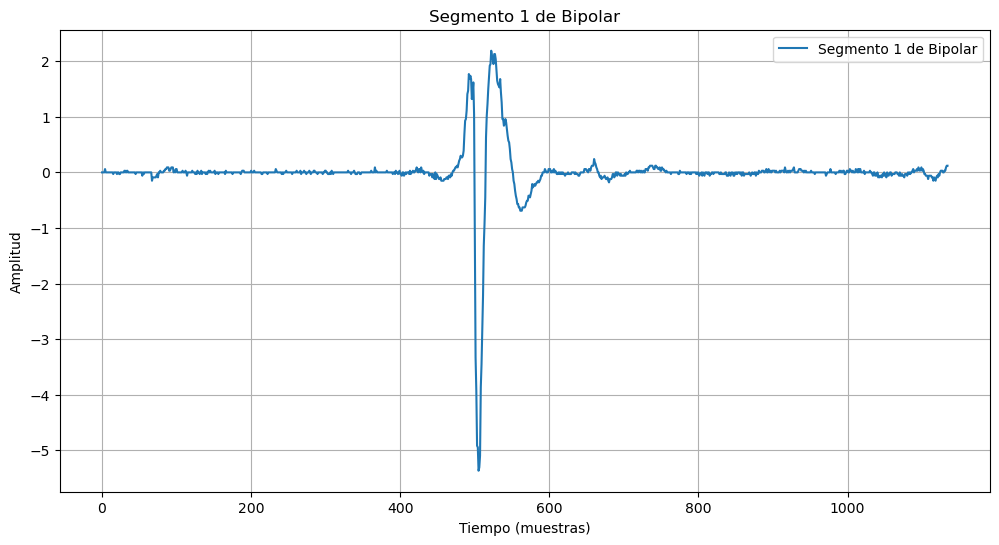

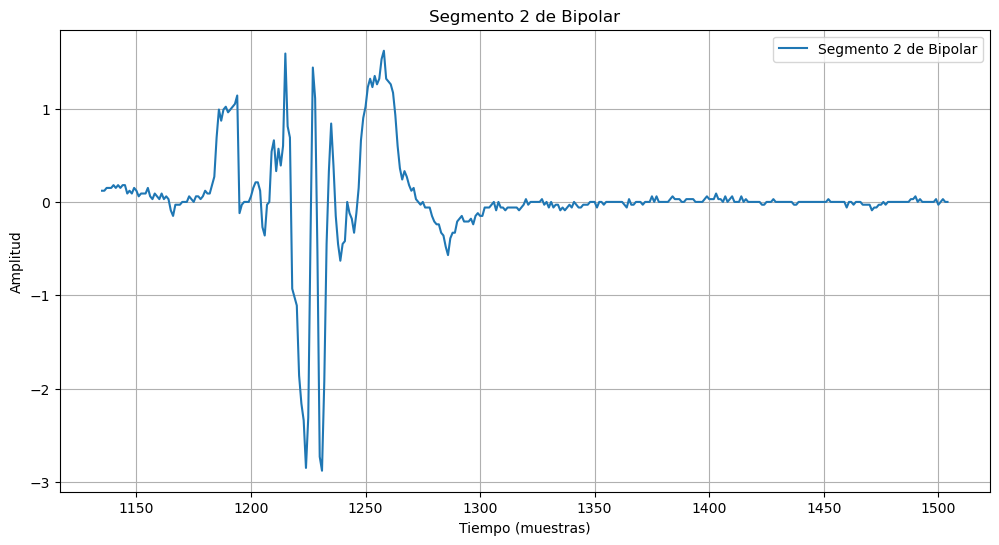

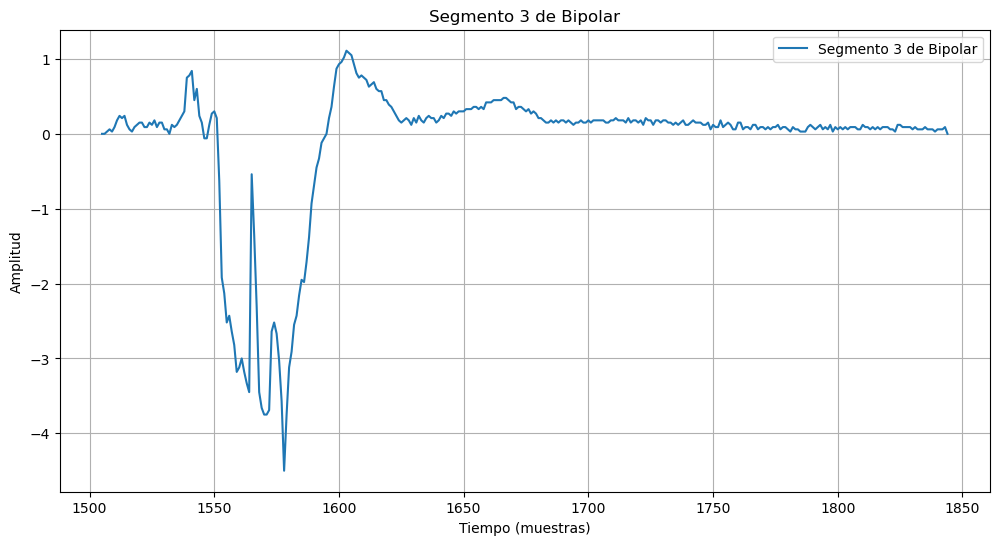

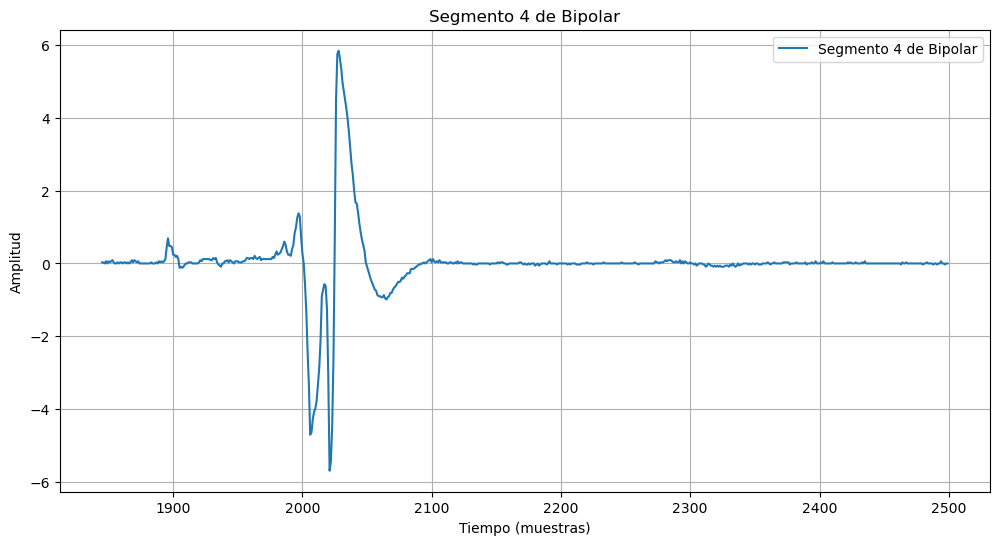

Resultados y gráficas para V5:
Resultados para V5:
Segmento 1:
Máximo: 2.6399999999999997
Mínimo: -1.1099999999999999


Segmento 2:
Máximo: 4.89
Mínimo: -3.06


Segmento 3:
Máximo: 6.42
Mínimo: -3.4499999999999997


Segmento 4:
Máximo: 2.4899999999999998
Mínimo: -3.48




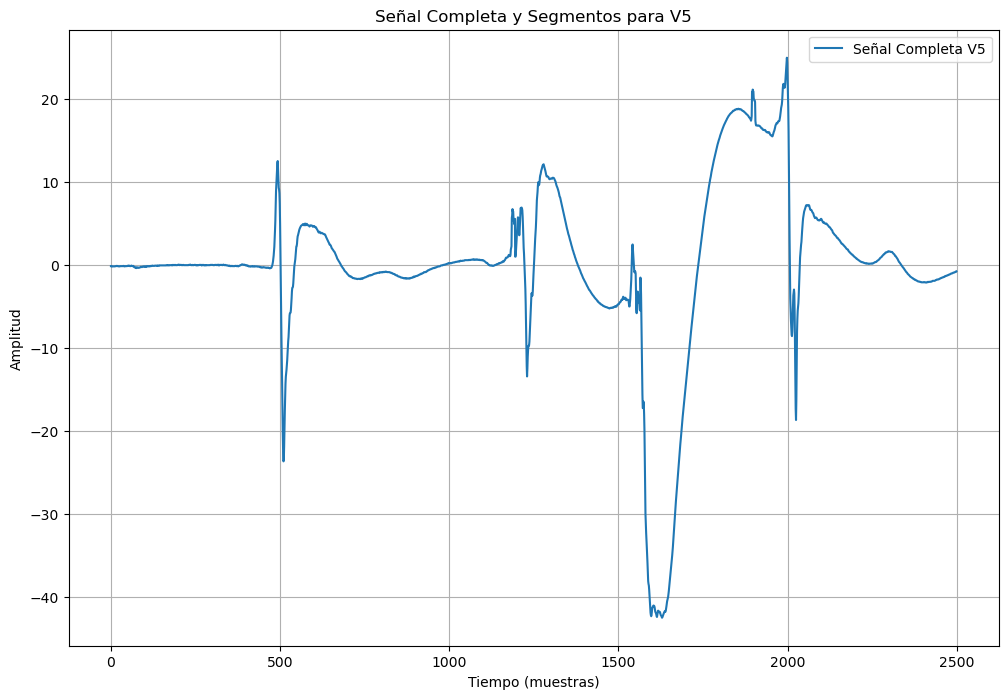

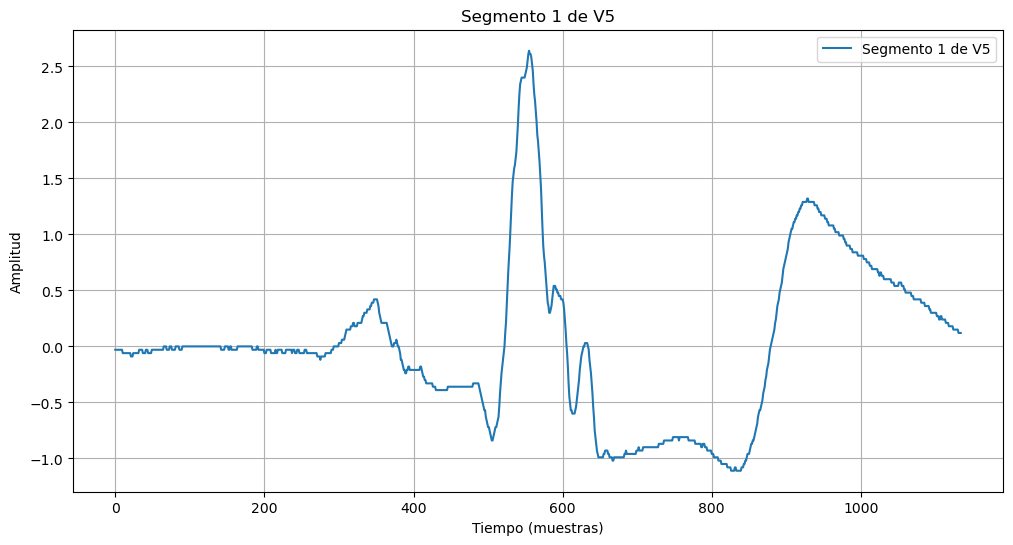

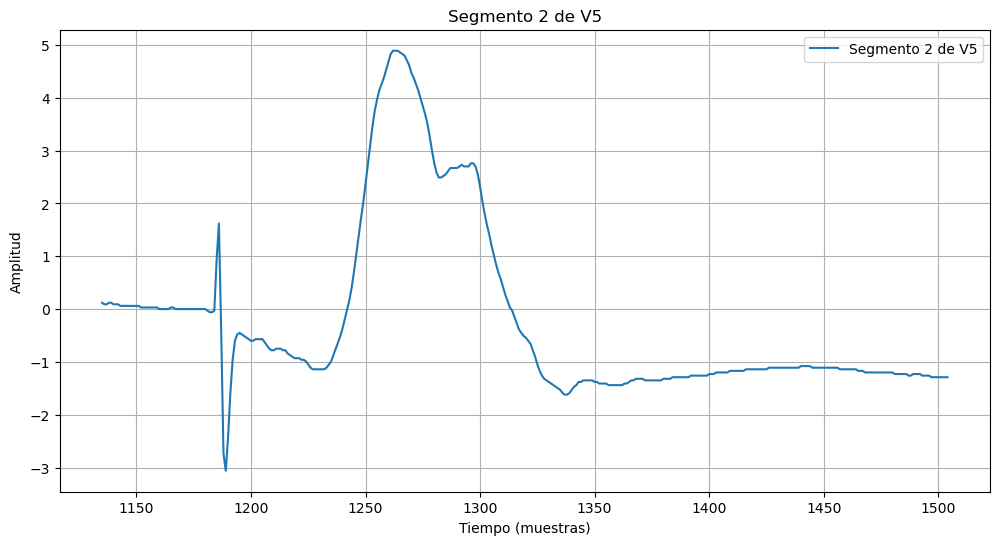

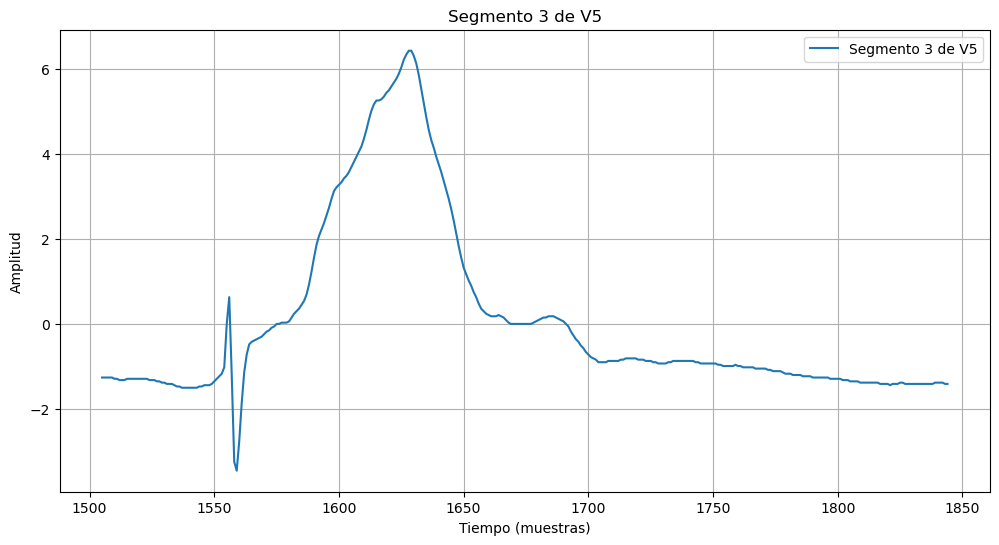

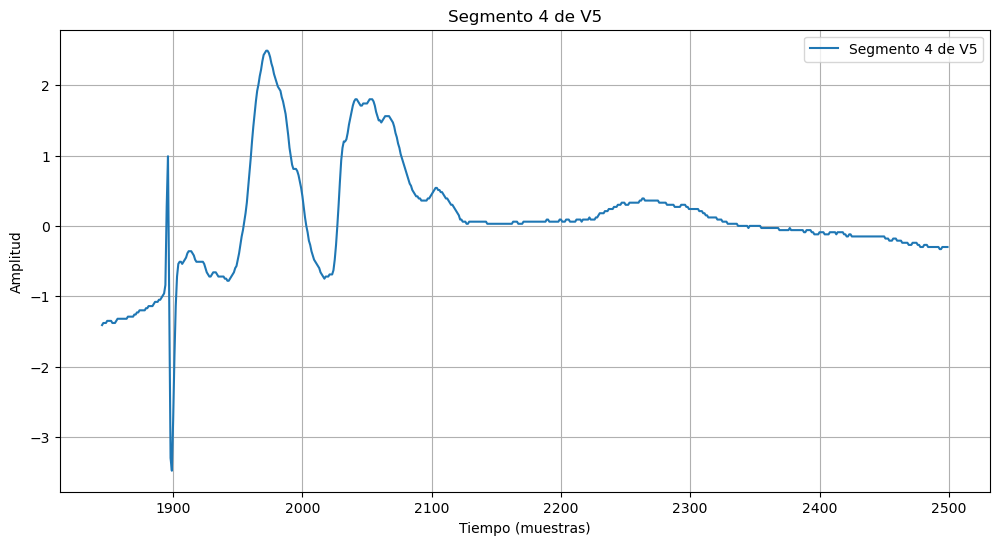

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, firwin, lfilter

# Supongamos que df_seleccionado es tu DataFrame original
df = df_seleccionado

# Asumir que las señales Unipolar, Bipolar y V5 están en el DataFrame
unipolar = df['MCC_Dx_UniPolar_44(543)']
bipolar = df['MCC_Dx_BiPolar_37(233)']
v5 = df['V5(26)']

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
nyq = fs / 2  # Frecuencia de Nyquist

# Diseño del filtro FIR pasa banda
cutoff_band_ref = [0.25, 150]  # Frecuencias de corte en Hz
fir_band_ref = firwin(101, [cutoff_band_ref[0] / nyq, cutoff_band_ref[1] / nyq], pass_zero=False)

# Aplicar el filtro a la señal cs1
cs1 = df['CS1(11)']
filtered_cs1 = lfilter(fir_band_ref, 1.0, cs1)

# Definir función para detectar picos y segmentar datos
def detectar_y_segmentar(data, threshold=500):
    # Detectar picos ascendentes y descendentes
    peaks, _ = find_peaks(data, height=threshold)
    troughs, _ = find_peaks(-data, height=threshold)

    # Unir picos y valles en una sola lista y ordenarlos
    peaks_and_troughs = np.sort(np.concatenate((peaks, troughs)))

    # Filtrar los puntos que superan el umbral en positivo seguido de un punto que lo supere en negativo
    valid_segments = []
    for i in range(len(peaks_and_troughs) - 1):
        if data[peaks_and_troughs[i]] > threshold and data[peaks_and_troughs[i + 1]] < -threshold:
            valid_segments.append(peaks_and_troughs[i])

    # Plotear los datos y los picos detectados
    plt.figure(figsize=(12, 8))
    plt.plot(data, label='Señal Completa')
    plt.plot(peaks, data[peaks], "x", label='Picos')
    plt.plot(troughs, data[troughs], "o", label='Valles')
    for seg in valid_segments:
        plt.axvline(x=seg - 50, color='r', linestyle='--', label='Segmento Detectado' if seg == valid_segments[0] else "")
    plt.title("Detección de Picos y Valles")
    plt.xlabel('Tiempo (muestras)')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid()
    plt.show()

    # Dividir los datos en segmentos
    segments = []
    slicers = []
    start = 0

    for index in valid_segments:
        end = max(0, index - 50)
        segments.append(data[start:end])
        slicers.append((start, end))
        start = end

    # Asegurarse de que la última parte del ritmo sinusal también se incluya
    segments.append(data[start:])
    slicers.append((start, len(data)))  # Incluye el último segmento completo

    return segments, slicers

# Detectar y segmentar para cs1
print("Procesando cs1:")
segments_cs1, slicers_cs1 = detectar_y_segmentar(cs1, threshold=500)

# Función para dividir otras señales en los mismos segmentos y calcular máximos y mínimos
def segmentar_y_calcular(signal, slicers):
    segmentos = []
    maximos = []
    minimos = []

    for start, end in slicers:
        segmento = signal[start:end]
        segmentos.append(segmento)
        maximos.append(np.max(segmento))
        minimos.append(np.min(segmento))

    return segmentos, maximos, minimos

# Dividir las señales Unipolar, Bipolar y V5 en los mismos segmentos
segments_unipolar, max_unipolar, min_unipolar = segmentar_y_calcular(unipolar, slicers_cs1)
segments_bipolar, max_bipolar, min_bipolar = segmentar_y_calcular(bipolar, slicers_cs1)
segments_v5, max_v5, min_v5 = segmentar_y_calcular(v5, slicers_cs1)

# Función para plotear la señal completa y los segmentos
def plotear_segnal_y_segmentos(signal, segments, nombre):
    plt.figure(figsize=(12, 8))
    plt.plot(signal, label=f'Señal Completa {nombre}')
    plt.title(f'Señal Completa y Segmentos para {nombre}')
    plt.xlabel('Tiempo (muestras)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.legend()
    plt.show()

    # Plotear segmentos
    for i, segmento in enumerate(segments):
        plt.figure(figsize=(12, 6))
        plt.plot(segmento, label=f'Segmento {i + 1} de {nombre}')
        plt.title(f'Segmento {i + 1} de {nombre}')
        plt.xlabel('Tiempo (muestras)')
        plt.ylabel('Amplitud')
        plt.grid()
        plt.legend()
        plt.show()

# Imprimir resultados y plotear para cada señal
def imprimir_resultados_y_plotear(segments, maximos, minimos, nombre):
    print(f"Resultados para {nombre}:")
    for i, (segmento, maximo, minimo) in enumerate(zip(segments, maximos, minimos)):
        print(f"Segmento {i + 1}:")
        print(f"Máximo: {maximo}")
        print(f"Mínimo: {minimo}")
        print("\n")
    plotear_segnal_y_segmentos(unipolar, segments, nombre)

print("Resultados y gráficas para Unipolar:")
imprimir_resultados_y_plotear(segments_unipolar, max_unipolar, min_unipolar, "Unipolar")

print("Resultados y gráficas para Bipolar:")
imprimir_resultados_y_plotear(segments_bipolar, max_bipolar, min_bipolar, "Bipolar")

print("Resultados y gráficas para V5:")
imprimir_resultados_y_plotear(segments_v5, max_v5, min_v5, "V5")